# CAPSTONE PROJECT

# Customer Segmentation Using K-Means Algorithm (Case Study : Customer Taspen Jabodetabek Area)


# Group Member : 

- Rizky Prihastanto
- Rizal Purwosaputro
- Nefiana Mey Ipradita

# Problem Statements:

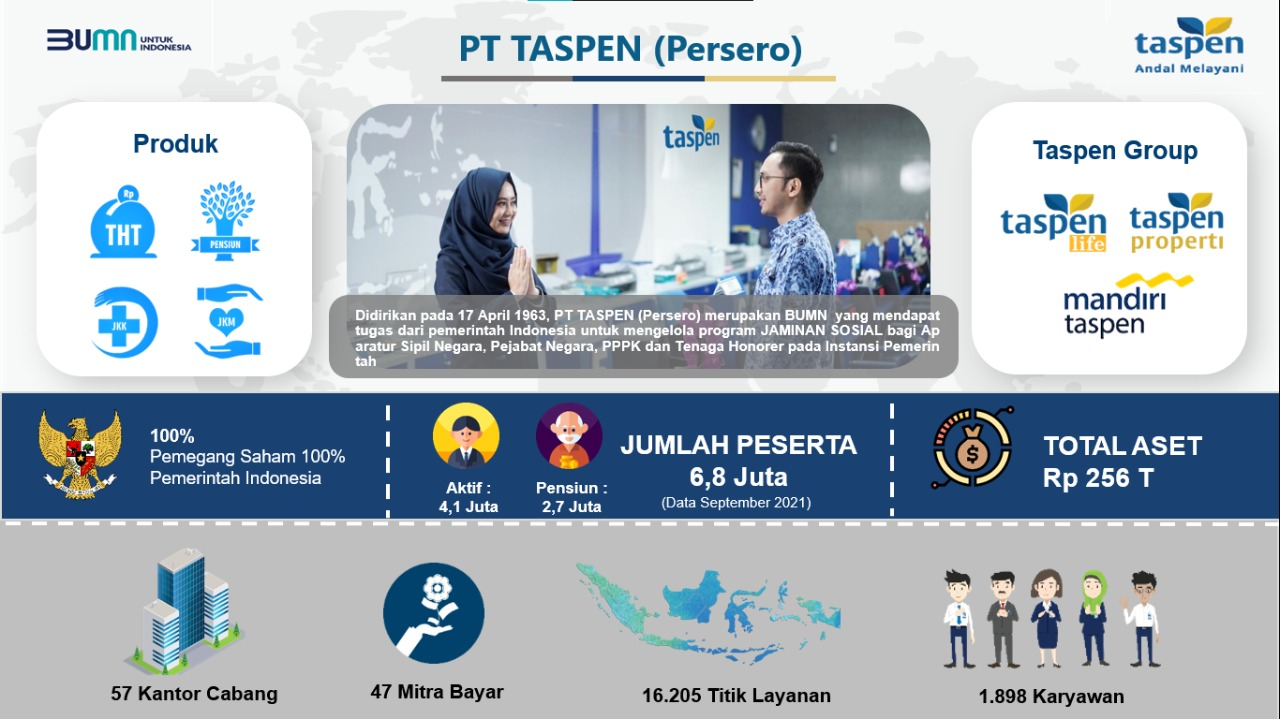

PT TASPEN (Persero) is a State-Owned Enterprise (BUMN) assigned by the Government of Indonesia to manage social security programs for ASN, State Officials, and PPPK (Government Employees with Work Agreements). Turn into 58 years old in 2021, PT TASPEN (Persero) is increasing try to improve the quality of service to participants to realize Delighted Customer Service (DCS) based on services exceeding participants' expectations. Through the Old Age Savings (THT), Pension, Work Accident Insurance (JKK) programs), and Death Insurance (JKM). Serves 3,984,023 Active Customer and 2,857,043 Pension Customer as of June 2021 with a Service Network of 57 KCU/KC,) to be able to provide comprehensive services with specific service characteristics.


In the Long Term (Rencana Jangka Panjang) of PT TASPEN (Persero) for 2019 - 2023, focuses on targets and strategies as well as work programs to strengthen the foundation of 14,394 service points, 46 Pay Partners spread throughout Indonesia. The large area coverage and the number of participants demand PT TASPEN (Persero) and the company's structure and capacity in the future. 

The Accelerating Business Growth initiative shows that PT TASPEN (Persero) wants to accelerate the business growth of PT TASPEN (Persero) through business initiatives such as maximizing the growth of its subsidiary PT TASPEN (Persero). In order to achieve this position, the company sets strategic targets that are in line with research, one of which is the development of subsidiaries through market synergies and market expansion for both ASN and the general public. One of the subsidiaries of PT TASPEN (Persero) is Taspen Life which is engaged in life insurance.

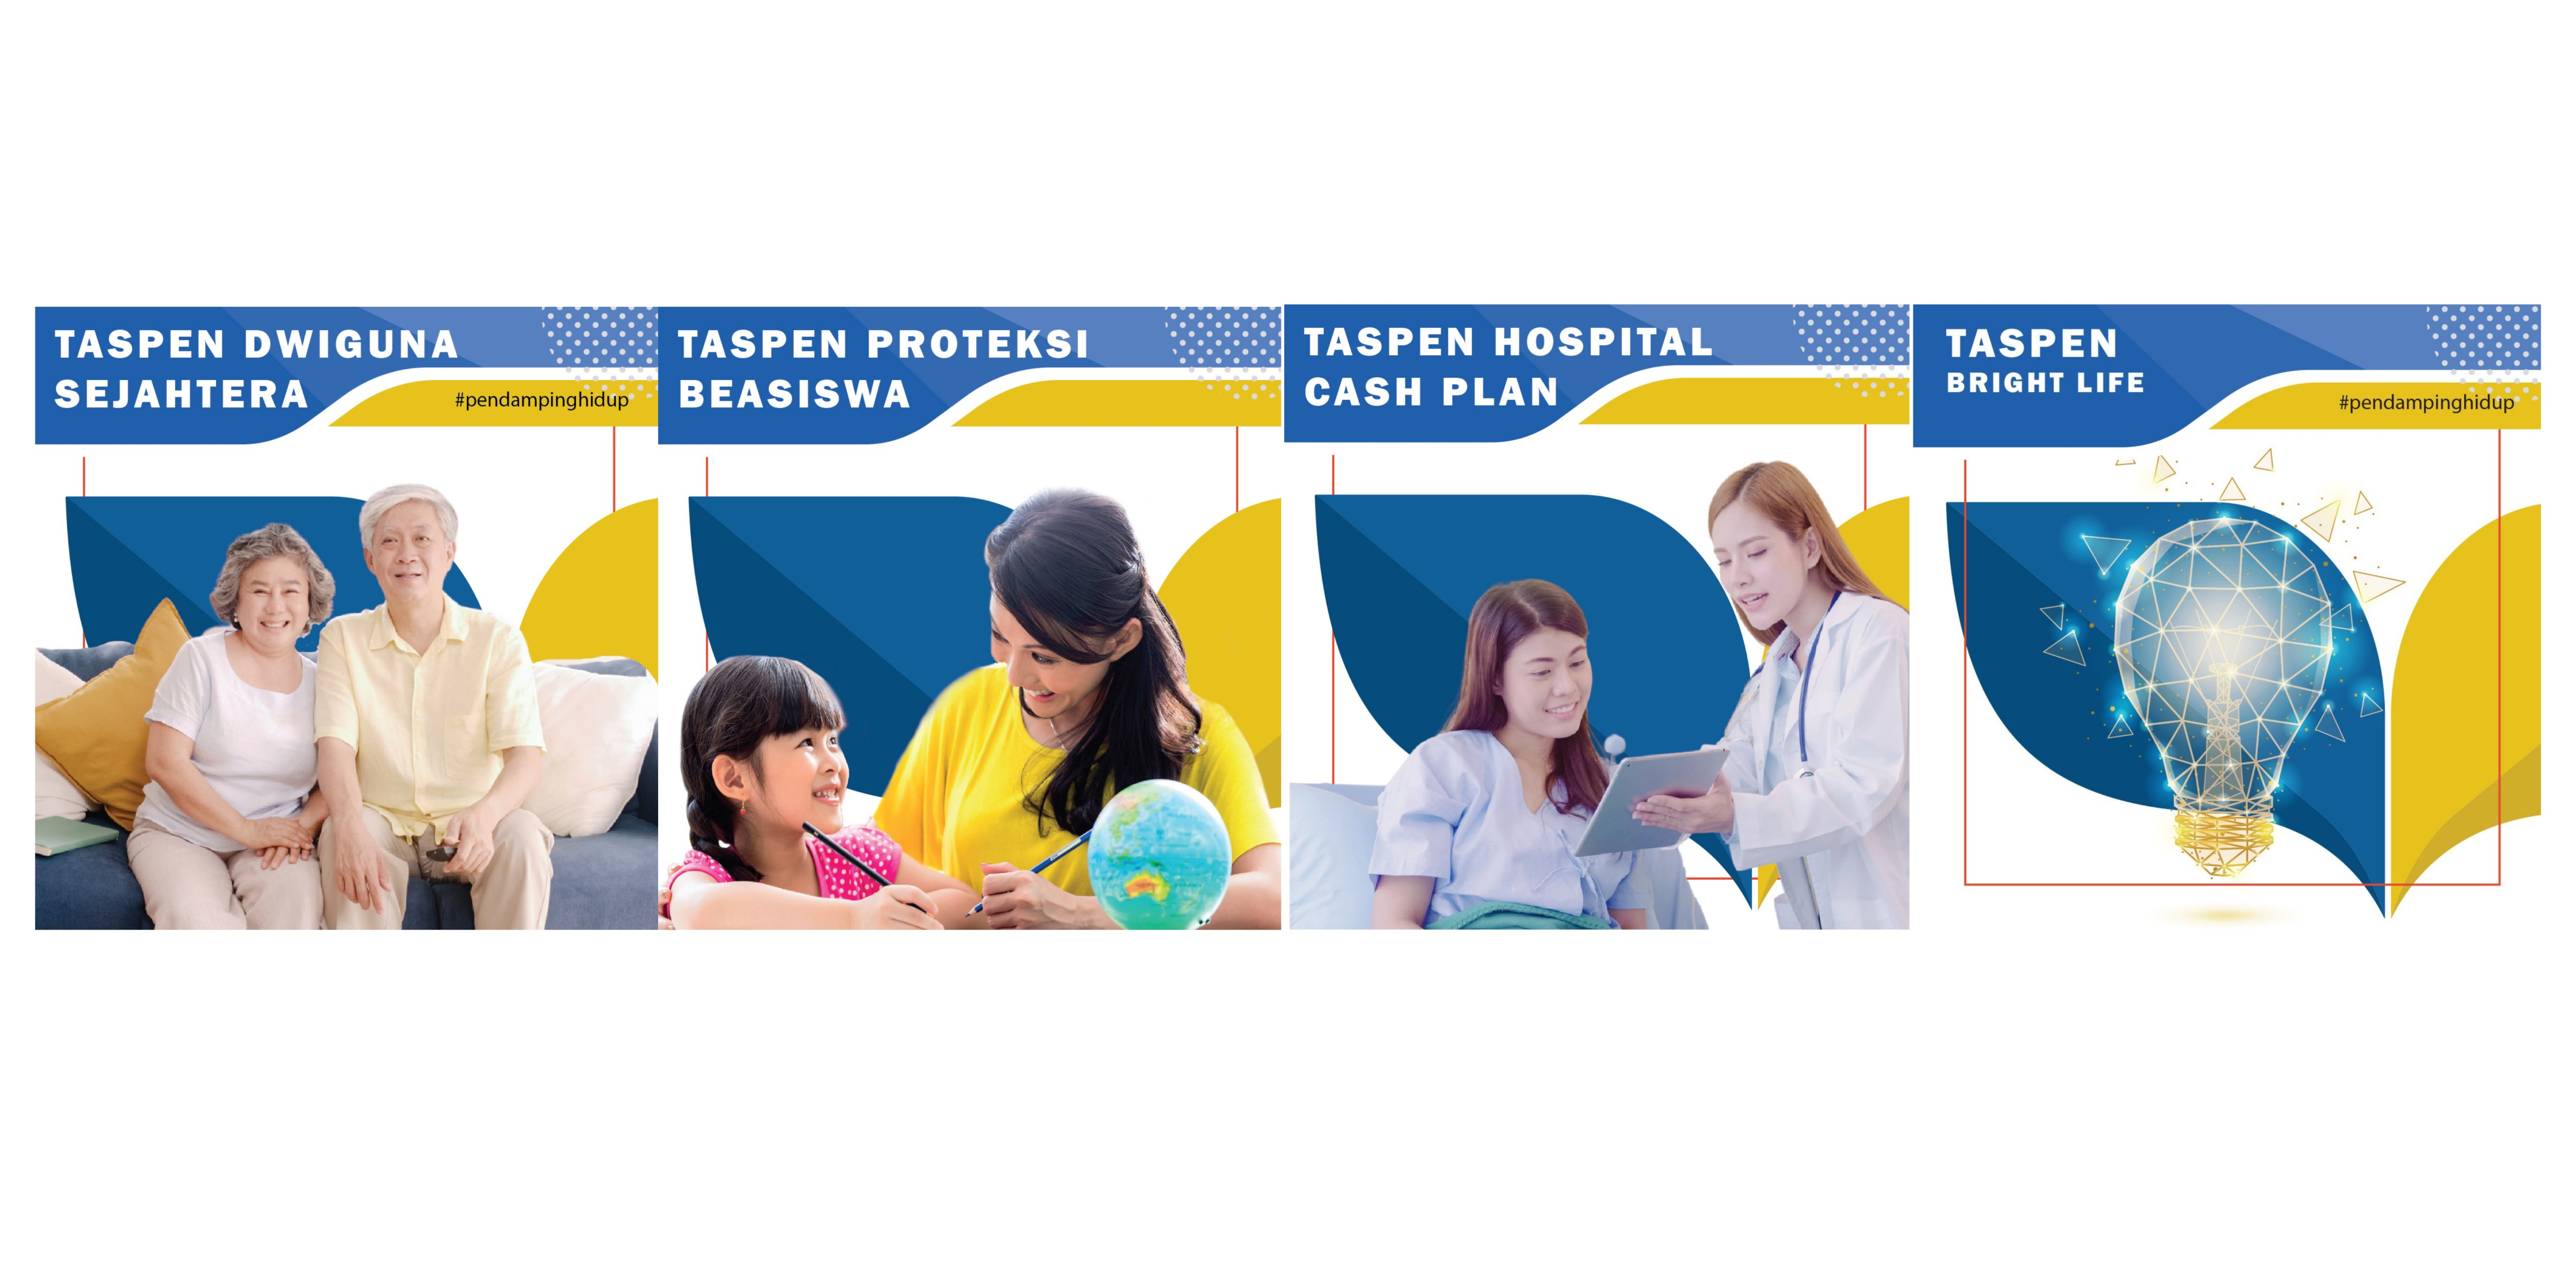

According to the total sales recap of Taspen Life products in 2020, as many as 42,296 out of 6,841.00 TASPEN participants used Taspen Life life insurance products. It can be seen from the data that TASPEN participants who use the Taspen Life insurance program are only 0.62%. Based on the data described above, Taspen Life has the opportunity to optimize product marketing to TASPEN participants who are not familiar with and use the Taspen Life Life insurance product so that it is right on target so that the percentage value of Taspen Life product users can increase.
As a sample data for clustering, we use data from Taspen participants in the Jabodetabek area. There are pension customer using the parameters 'JMLISTRI', 'JMLANAK', 'UMUR', and 'THP' and active customer using the parameters 'JMLISTRI', 'JMLANAK', 'UMUR', 'SISA_UMUR_BUP', and 'THP'.

In this Capstone Project, we will demonstrate an analysis of product sales recommendations using the Taspen Participant dataset in the Jabodetabek area. The analysis carried out includes clustering using the K-means algorithm.
Through this analysis, we want to evaluate the possibility of performing clustering to produce selling optimization with customer segmentation. 

* Import Library and Read Data

In [2]:
#Import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.linalg import eig
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import importlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from helper import biplot_pca, plot_elbow, biplot_kmeans, plot_cluster_radar, BCSS
from datetime import date
import seaborn as sns

plt.style.use('seaborn')

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#load data csv dan lihat spesifikasi dataset
data = pd.read_csv('data_input/customer-data-new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_PESERTA           50000 non-null  object 
 1   ID_CABANG            50000 non-null  int64  
 2   TMT_KERJA            50000 non-null  object 
 3   TMT_TASPEN           50000 non-null  object 
 4   TGLPMK               25308 non-null  object 
 5   BUP                  50000 non-null  float64
 6   BLTHGAJI             47017 non-null  object 
 7   KODEREG              947 non-null    float64
 8   JMLISTRI             50000 non-null  int64  
 9   JMLANAK              50000 non-null  int64  
 10  THP                  50000 non-null  int64  
 11  PERSEN_GAPOK         50000 non-null  float64
 12  TMT_MUTASI           50000 non-null  object 
 13  TUKIN                48964 non-null  float64
 14  TUJAB                49980 non-null  float64
 15  NILAI_REALISASI      49992 non-null 

In [4]:
#view value dataframe
data.head()

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,BLTHGAJI,KODEREG,JMLISTRI,JMLANAK,THP,PERSEN_GAPOK,TMT_MUTASI,TUKIN,TUJAB,NILAI_REALISASI,TGL_CAIR_SAP,TGL_UPDATE_SAP,KETERANGAN,GELAR_DEPAN,GELAR_AKHIR,TGL_LAHIR,TGL_WAFAT,ALAMAT,MASKER,TMT_GAPOK,NILAI_BAWAH,NILAI_ATAS,ACTIVE,KODE_SATKER,SATKER_PEMDA,NAMA_SATKER,NOTELP,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,KOTA_DATI3,NAMA_DATI2,KOTA_DATI2
0,16A8ED316F97425C1700B06CFB291994,2,1990-03-01,1990-03-01,2015-08-01,62.000,2014-05-01,NaN,1,2,4415220,100.000,2015-11-01,0.000,0.000,0.000,NaN,NaN,NaN,DR. ...,"AK,MBA,PHD ...",1961-04-29,NaN,JL PEGANGSAAN INDAH BRT D/5 RT.07/16,17.000,2015-01-01,3873000.000,3873000.000,1.000,B10008900100001,401108,PT ANEKA TAMBANG (ANTAM),NaN,PEGAWAI PENSIUN,18,PNS YANG DIPERBANTUKAN KEBUMN BUKAN TASPEN,PEGANGSAAN DUA,KELAPA GADING,KELAPAGADING,JAKARTA UTARA,JAKARTAUTARA
1,F5EEFC316F97425C1700B06CFB291994,2,1980-02-01,1980-02-01,2016-05-01,58.000,2016-04-01,NaN,1,1,5170592,100.000,2016-05-01,0.000,0.000,413647.000,NaN,NaN,NaN,NaN,S.SOS ...,1958-04-09,NaN,KEBON KELAPA RT.002/002,30.000,2015-01-01,4616600.000,4616600.000,1.000,D10000100300007,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,NaN,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,KAMAL,KALIDERES,KALIDERES,JAKARTA BARAT,JAKARTABARAT
2,F3B421316F97425C1700B06CFB291994,2,1975-07-01,1975-07-01,2011-09-01,58.000,2011-08-01,NaN,1,0,3422760,100.000,2011-04-01,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,1955-08-29,NaN,JL.PISANGAN BARU TIMUR NO.7 RT 001/010,30.000,2010-01-01,2725200.000,2725200.000,1.000,D10000100300007,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,NaN,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,PISANGAN BARU,MATRAMAN,MATRAMAN,JAKARTA TIMUR,JAKARTATIMUR
3,281F43316F97425C1700B06CFB291994,2,1985-08-01,1985-08-01,2016-10-01,58.000,2016-09-01,NaN,1,1,4473280,100.000,2016-09-01,0.000,0.000,357863.000,NaN,NaN,NaN,NaN,",SH. ...",1958-09-27,NaN,JL.TENGKI N0.58 A RT.007/03,26.000,2015-01-01,3994000.000,3994000.000,1.000,D10000100300007,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,NaN,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,CIPAYUNG,CIPAYUNG,CIPAYUNG,JAKARTA TIMUR,JAKARTATIMUR
4,942E3F316F97425C1700B06CFB291994,29,1984-03-01,1984-03-01,2011-06-01,58.000,2011-04-01,NaN,1,2,2720704,100.000,2011-04-01,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,1955-05-27,NaN,TAMAN WISMA ASRI AA25/45 RT 007 RW 028,23.000,2010-01-01,1996300.000,1996300.000,1.000,D10000100300007,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,NaN,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,TELUK PUCUNG,BEKASI UTARA,BEKASIUTARA,KOTA BEKASI,BEKASI


* **Data Wrangling** (*6 points*)

  * Demonstrated how to apply some data transformations,handling missing values and duplicated or any statistical approach here to make sure that your data is "ready".
  * Demonstrated how to properly do feature engineering/ variable selection.

a. *Drop Kolom*

In [5]:
#cek data duplicate dari dataframe data, karena tidak ada maka tidak ada penanganan
data.duplicated().sum()

0

In [6]:
#cek data null dari dataframe data
data.isna().sum()

ID_PESERTA                 0
ID_CABANG                  0
TMT_KERJA                  0
TMT_TASPEN                 0
TGLPMK                 24692
BUP                        0
BLTHGAJI                2983
KODEREG                49053
JMLISTRI                   0
JMLANAK                    0
THP                        0
PERSEN_GAPOK               0
TMT_MUTASI                 0
TUKIN                   1036
TUJAB                     20
NILAI_REALISASI            8
TGL_CAIR_SAP           24138
TGL_UPDATE_SAP         24138
KETERANGAN             25837
GELAR_DEPAN            44666
GELAR_AKHIR            38781
TGL_LAHIR                  3
TGL_WAFAT              47568
ALAMAT                  1163
MASKER                  2360
TMT_GAPOK               2360
NILAI_BAWAH             2360
NILAI_ATAS              2360
ACTIVE                  2360
KODE_SATKER             1231
SATKER_PEMDA            1231
NAMA_SATKER             1231
NOTELP                 49827
NAMA_STATUS_PEGAWAI        0
KODE_JENIS_PEG

In [7]:
#ambil field yang dibutuhkan dan masukan ke dataframe baru
kolom = ['ID_PESERTA','ID_CABANG','TMT_KERJA','TMT_TASPEN','TGLPMK','BUP','JMLISTRI','JMLANAK','THP','TGL_LAHIR','TGL_WAFAT',
         'MASKER','SATKER_PEMDA','NAMA_SATKER','NAMA_STATUS_PEGAWAI','KODE_JENIS_PEGAWAI','NAMA_JENIS_PEGAWAI','NAMA_DATI4',
         'NAMA_DATI3','NAMA_DATI2']
data_new = data[kolom].copy()

In [8]:
#ubah tipe data tanggal
col_date = ['TMT_KERJA','TMT_TASPEN','TGLPMK','TGL_LAHIR','TGL_WAFAT']
data_new[col_date] = data_new[col_date].apply(pd.to_datetime)

In [9]:
#ubah tipe data category
col_cat = ['ID_PESERTA','ID_CABANG','SATKER_PEMDA','NAMA_SATKER','NAMA_STATUS_PEGAWAI','KODE_JENIS_PEGAWAI',
           'NAMA_JENIS_PEGAWAI','NAMA_DATI4','NAMA_DATI3','NAMA_DATI2']
data_new[col_cat] = data_new[col_cat].astype('category')

In [10]:
#view 
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_PESERTA           50000 non-null  category      
 1   ID_CABANG            50000 non-null  category      
 2   TMT_KERJA            50000 non-null  datetime64[ns]
 3   TMT_TASPEN           50000 non-null  datetime64[ns]
 4   TGLPMK               25308 non-null  datetime64[ns]
 5   BUP                  50000 non-null  float64       
 6   JMLISTRI             50000 non-null  int64         
 7   JMLANAK              50000 non-null  int64         
 8   THP                  50000 non-null  int64         
 9   TGL_LAHIR            49997 non-null  datetime64[ns]
 10  TGL_WAFAT            2432 non-null   datetime64[ns]
 11  MASKER               47640 non-null  float64       
 12  SATKER_PEMDA         48769 non-null  category      
 13  NAMA_SATKER          48769 non-

In [11]:
#cek persentase data null dari dataframe data
( data_new.isna().sum() / data_new.shape[0] ) * 100

ID_PESERTA             0.000
ID_CABANG              0.000
TMT_KERJA              0.000
TMT_TASPEN             0.000
TGLPMK                49.384
BUP                    0.000
JMLISTRI               0.000
JMLANAK                0.000
THP                    0.000
TGL_LAHIR              0.006
TGL_WAFAT             95.136
MASKER                 4.720
SATKER_PEMDA           2.462
NAMA_SATKER            2.462
NAMA_STATUS_PEGAWAI    0.000
KODE_JENIS_PEGAWAI     0.000
NAMA_JENIS_PEGAWAI     0.000
NAMA_DATI4             0.000
NAMA_DATI3             0.000
NAMA_DATI2             0.000
dtype: float64

b. *Drop Record Null dan Anomali*

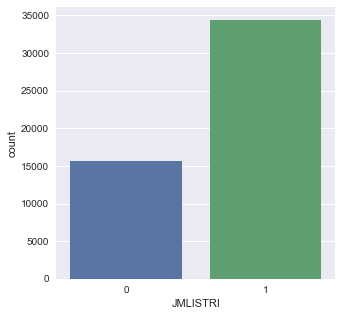

In [12]:
#cek data Jumlah Istri
plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLISTRI", data=data_new)

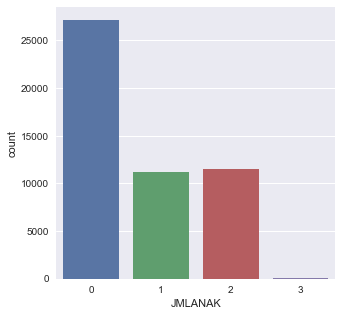

In [13]:
#cek data Jumlah Anak
plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLANAK", data=data_new)

In [14]:
#cek record TGL_LAHIR yang nan di dataframe data_new
data_new.loc[data_new['TGL_LAHIR'].isna() == True]

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,JMLISTRI,JMLANAK,THP,TGL_LAHIR,TGL_WAFAT,MASKER,SATKER_PEMDA,NAMA_SATKER,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,NAMA_DATI2
1807,84FA0B30BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1985-01-01,58.000,0,0,0,NaT,NaT,NaN,NaN,NaN,PEGAWAI PENSIUN,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA
32141,54AA0330BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1985-01-01,58.000,0,0,107423,NaT,NaT,NaN,NaN,NaN,PEGAWAI PENSIUN,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA
47059,CF8A0830BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1986-06-01,58.000,0,0,0,NaT,NaT,NaN,NaN,NaN,PEGAWAI PENSIUN,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA


In [15]:
#drop record TGL_LAHIR yang nan karena dibutuhkan untuk menghitung umur dan lihatjumlah datan
data_new = data_new.drop(data_new.loc[data_new['TGL_LAHIR'].isna()].index.values)
data_new.shape

(49997, 20)

In [16]:
#cek jumlah record TGL_WAFAT yang nan di dataframe data_new
data_new.loc[data_new['TGL_WAFAT'].notna() == True].shape

(2432, 20)

In [17]:
#drop record TGL_WAFAT yang terisi karena yang kita analisis adalah peserta yang masih hidup 
data_new = data_new.drop(data_new.loc[data_new['TGL_WAFAT'].notna()].index.values)
data_new.shape

(47565, 20)

In [18]:
#view data tanggal PMK yang kurang dari TMT Taspen
data_new.loc[data_new['TGLPMK'] < data_new['TMT_TASPEN']].head()

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,JMLISTRI,JMLANAK,THP,TGL_LAHIR,TGL_WAFAT,MASKER,SATKER_PEMDA,NAMA_SATKER,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,NAMA_DATI2
33259,F3020E30BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1900-01-01,58.000,0,0,34860,1964-01-02,NaT,NaN,NaN,NaN,PEGAWAI KELUAR,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA
39358,1C000E30BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1900-01-01,58.000,0,0,39785,1962-03-01,NaT,NaN,NaN,NaN,PEGAWAI KELUAR,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA
42041,57B70330BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1900-01-02,58.000,0,0,559,1921-02-02,NaT,NaN,NaN,NaN,PEGAWAI PENSIUN,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA
48740,C7A01830BB47245D1700B06C30A495DA,2,1961-07-01,1961-07-01,1929-03-01,58.000,0,0,113886,1929-12-01,NaT,NaN,NaN,NaN,PEGAWAI PENSIUN,1,PNS PUSAT,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA


In [19]:
#cek jumlah data dengan kasus anomali tanggal pmk yang kurang dari tmt taspen, karna tidak ada tidak dilakukan drop
data_new.loc[data_new['TGLPMK'] < data_new['TMT_TASPEN']].shape

(4, 20)

In [20]:
#drop tanggal pmk yang kurang dari tmt taspen dan view jumlah data terkini
data_new = data_new.drop(data_new.loc[data_new['TGLPMK'] < data_new['TMT_TASPEN']].index.values)
data_new.shape

(47561, 20)

In [21]:
#view data masker yang null
data_new.loc[data_new['MASKER'].isna()].head()

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,JMLISTRI,JMLANAK,THP,TGL_LAHIR,TGL_WAFAT,MASKER,SATKER_PEMDA,NAMA_SATKER,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,NAMA_DATI2
24,8ED038316F97425C1700B06CFB291994,2,1977-03-01,1977-03-01,2003-05-01,58.000,0,1,1121715,1947-04-05,NaT,NaN,11533,PT PELINDO II CAR TERMINAL,PEGAWAI PENSIUN,16,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,PONDOK KELAPA,DUREN SAWIT,JAKARTA TIMUR
25,2F45F8316F97425C1700B06CFB291994,11,1964-10-01,1964-10-01,2000-06-01,58.000,1,0,622050,1944-05-01,NaT,NaN,11533,PT PELINDO II CAR TERMINAL,PEGAWAI PENSIUN,16,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,PONDOK RANJI,CIPUTAT,KABUPATEN TANGERANG
26,25CF27316F97425C1700B06CFB291994,2,1978-12-01,1978-12-01,2003-01-01,58.000,1,0,1297120,1946-12-11,NaT,NaN,11533,PT PELINDO II CAR TERMINAL,PEGAWAI PENSIUN,16,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,PONDOK KELAPA,DUREN SAWIT,JAKARTA TIMUR
31,652B30316F97425C1700B06CFB291994,2,1986-02-01,1986-02-01,2005-07-01,58.000,0,0,1487000,1949-06-12,NaT,NaN,11515,PT PELINDOCABANG SUNDA KELAPA,PEGAWAI PENSIUN,1,PNS PUSAT,CILANDAK BARAT,CILANDAK,JAKARTA SELATAN
32,E6AEEA316F97425C1700B06CFB291994,2,1985-09-01,1985-09-01,2004-09-01,58.000,0,1,1374660,1948-08-25,NaT,NaN,11515,PT PELINDOCABANG SUNDA KELAPA,PEGAWAI PENSIUN,16,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,RAWA BUAYA,CENGKARENG,JAKARTA BARAT


In [22]:
#cek missing value dari dataframe
data_new.isna().sum()

ID_PESERTA                 0
ID_CABANG                  0
TMT_KERJA                  0
TMT_TASPEN                 0
TGLPMK                 24686
BUP                        0
JMLISTRI                   0
JMLANAK                    0
THP                        0
TGL_LAHIR                  0
TGL_WAFAT              47561
MASKER                  1915
SATKER_PEMDA            1219
NAMA_SATKER             1219
NAMA_STATUS_PEGAWAI        0
KODE_JENIS_PEGAWAI         0
NAMA_JENIS_PEGAWAI         0
NAMA_DATI4                 0
NAMA_DATI3                 0
NAMA_DATI2                 0
dtype: int64

In [23]:
#Jumlah data masker yang null
data_new['MASKER'].isna().sum()

1915

In [24]:
#drop record masker yang null dan view jumlah data terkini
data_new = data_new.drop(data_new.loc[data_new['MASKER'].isna()].index.values)
data_new.shape

(45646, 20)

count   45646.000
mean       21.025
std         8.822
min         0.000
25%        15.000
50%        23.000
75%        28.000
max        37.000
Name: MASKER, dtype: float64


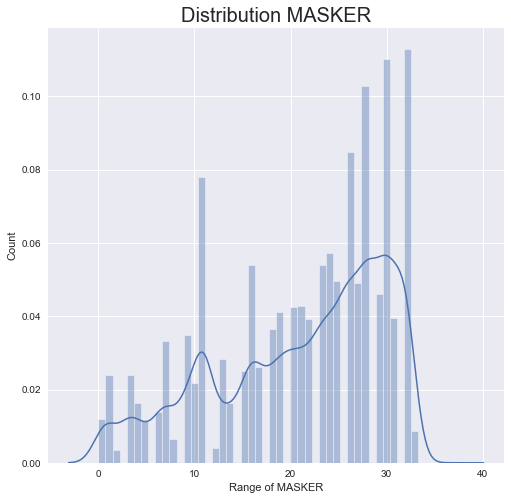

In [25]:
#lihat statistik dari masker, ada yg nilainya 0 
print(data_new['MASKER'].describe())
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data_new['MASKER'])
plt.title('Distribution MASKER', fontsize = 20)
plt.xlabel('Range of MASKER')
plt.ylabel('Count')
plt.show()

In [26]:
#Cek jumlah nilai MASKER yg nilainya 0 
data_new.loc[data_new['MASKER'] == 0].shape

(405, 20)

In [27]:
#drop record MASKER = 0 dan view jumlah data terkini
data_new = data_new.drop(data_new.loc[data_new['MASKER'] == 0].index.values)
data_new.shape

(45241, 20)

count      45241.000
mean     3722829.871
std       993144.836
min            0.000
25%      3105200.000
50%      3703280.000
75%      4455990.000
max     33264000.000
Name: THP, dtype: float64


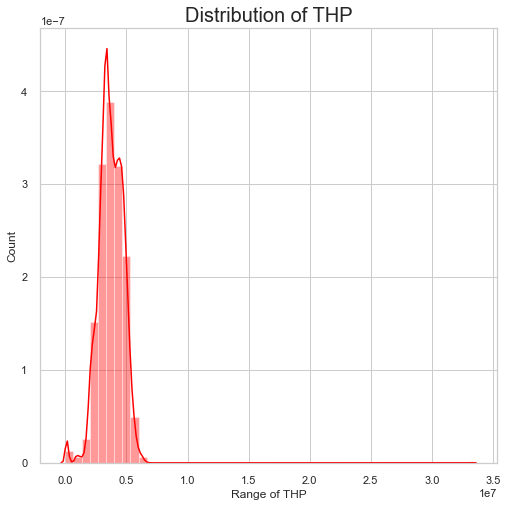

In [28]:
#lihat statistik dari THP, ada yg nilainya 0 
print(data_new['THP'].describe())
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data_new['THP'],color = 'red')
plt.title('Distribution of THP', fontsize = 20)
plt.xlabel('Range of THP')
plt.ylabel('Count')
plt.show()

In [29]:
#Cek jumlah nilai THP yg nilainya 0 
data_new.loc[data_new['THP'] == 0].shape

(18, 20)

In [30]:
#drop record THP = 0 dan view jumlah data terkini
data_new = data_new.drop(data_new.loc[data_new['THP'] == 0].index.values)
data_new.shape

(45223, 20)

count   45223.000
mean       58.371
std         2.291
min         0.000
25%        58.000
50%        58.000
75%        58.000
max        70.000
Name: BUP, dtype: float64


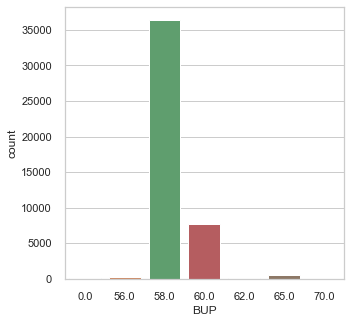

In [31]:
#lihat statistik dari BUP, ada yg nilainya 0 
print(data_new['BUP'].describe())
plt.figure(figsize=(5,5))
p = sns.countplot(x="BUP", data=data_new)

In [32]:
#Cek jumlah nilai BUP yg nilainya 0 
data_new.loc[data_new['BUP'] == 0].shape

(53, 20)

In [33]:
#drop record BUP = 0 dan view jumlah data terkini
data_new = data_new.drop(data_new.loc[data_new['BUP'] == 0].index.values)
data_new.shape

(45170, 20)

In [34]:
#cek kembali missing value dari dataframe, kecuali field TGLPMK dan TGL_WAFAT tidak masalah ada yg null
data_new.isna().sum()

ID_PESERTA                 0
ID_CABANG                  0
TMT_KERJA                  0
TMT_TASPEN                 0
TGLPMK                 24297
BUP                        0
JMLISTRI                   0
JMLANAK                    0
THP                        0
TGL_LAHIR                  0
TGL_WAFAT              45170
MASKER                     0
SATKER_PEMDA               0
NAMA_SATKER                0
NAMA_STATUS_PEGAWAI        0
KODE_JENIS_PEGAWAI         0
NAMA_JENIS_PEGAWAI         0
NAMA_DATI4                 0
NAMA_DATI3                 0
NAMA_DATI2                 0
dtype: int64

In [35]:
#reset index dataframe 
data_new.reset_index(drop=True, inplace=True)

c. *Tambah Field yang dibutuhkan (umur, sisa umur bup)*

In [36]:
#ubah tipe data integer
col_int = ['BUP','MASKER']
data_new[col_int] = data_new[col_int].astype('int64')

In [37]:
#menambahkan field umur
data_new['UMUR'] = date.today().year - data_new['TGL_LAHIR'].dt.year

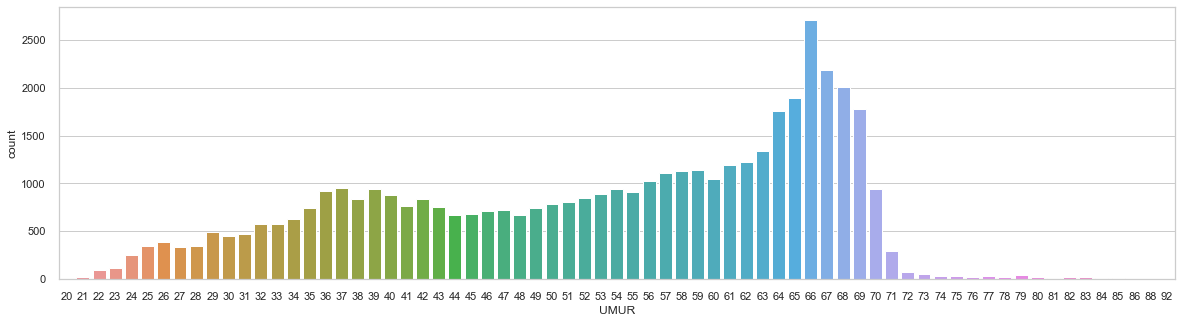

In [38]:
#grafik field umur
plt.figure(figsize=(20,5))
p = sns.countplot(x="UMUR", data=data_new)

In [39]:
#menambahkan field sisa BUP
data_new['Sisa Umur BUP'] = data_new['BUP'] - data_new['UMUR']

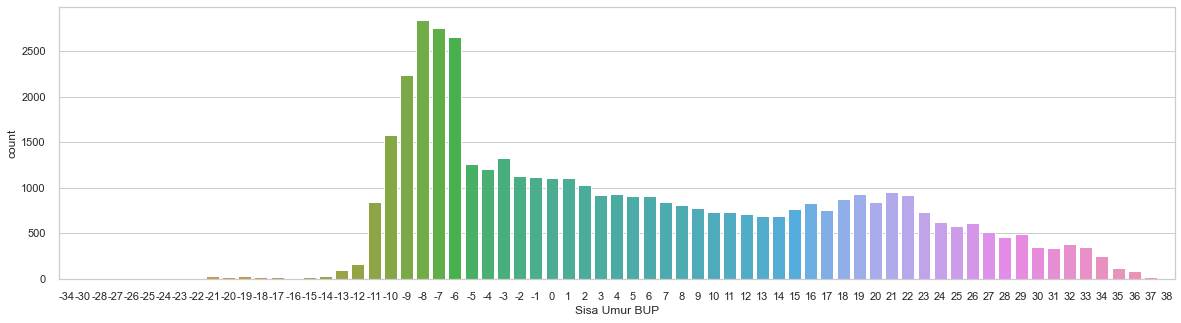

In [40]:
plt.figure(figsize=(20,5))
p = sns.countplot(x="Sisa Umur BUP", data=data_new)

In [41]:
#View Dataset setelah ditambahkan field
data_new.head()

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,JMLISTRI,JMLANAK,THP,TGL_LAHIR,TGL_WAFAT,MASKER,SATKER_PEMDA,NAMA_SATKER,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,NAMA_DATI2,UMUR,Sisa Umur BUP
0,16A8ED316F97425C1700B06CFB291994,2,1990-03-01,1990-03-01,2015-08-01,62,1,2,4415220,1961-04-29,NaT,17,401108,PT ANEKA TAMBANG (ANTAM),PEGAWAI PENSIUN,18,PNS YANG DIPERBANTUKAN KEBUMN BUKAN TASPEN,PEGANGSAAN DUA,KELAPA GADING,JAKARTA UTARA,60,2
1,F5EEFC316F97425C1700B06CFB291994,2,1980-02-01,1980-02-01,2016-05-01,58,1,1,5170592,1958-04-09,NaT,30,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,KAMAL,KALIDERES,JAKARTA BARAT,63,-5
2,F3B421316F97425C1700B06CFB291994,2,1975-07-01,1975-07-01,2011-09-01,58,1,0,3422760,1955-08-29,NaT,30,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,PISANGAN BARU,MATRAMAN,JAKARTA TIMUR,66,-8
3,281F43316F97425C1700B06CFB291994,2,1985-08-01,1985-08-01,2016-10-01,58,1,1,4473280,1958-09-27,NaT,26,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,CIPAYUNG,CIPAYUNG,JAKARTA TIMUR,63,-5
4,942E3F316F97425C1700B06CFB291994,29,1984-03-01,1984-03-01,2011-06-01,58,1,2,2720704,1955-05-27,NaT,23,500000103,INSPKETUR PEMBANTU KOTA ADM.JAKARTA TIMUR,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,TELUK PUCUNG,BEKASI UTARA,KOTA BEKASI,66,-8


In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45170 entries, 0 to 45169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_PESERTA           45170 non-null  category      
 1   ID_CABANG            45170 non-null  category      
 2   TMT_KERJA            45170 non-null  datetime64[ns]
 3   TMT_TASPEN           45170 non-null  datetime64[ns]
 4   TGLPMK               20873 non-null  datetime64[ns]
 5   BUP                  45170 non-null  int64         
 6   JMLISTRI             45170 non-null  int64         
 7   JMLANAK              45170 non-null  int64         
 8   THP                  45170 non-null  int64         
 9   TGL_LAHIR            45170 non-null  datetime64[ns]
 10  TGL_WAFAT            0 non-null      datetime64[ns]
 11  MASKER               45170 non-null  int64         
 12  SATKER_PEMDA         45170 non-null  category      
 13  NAMA_SATKER          45170 non-

In [43]:
data_new.describe()

,BUP,JMLISTRI,JMLANAK,THP,MASKER,UMUR,Sisa Umur BUP
count,45170.000,45170.000,45170.000,45170.000,45170.000,45170.000,45170.000
mean,58.440,0.723,0.732,3721889.807,21.233,53.037,5.403
std,1.119,0.448,0.835,970550.515,8.619,13.247,12.946
min,56.000,0.000,0.000,34400.000,1.000,20.000,-34.000
25%,58.000,0.000,0.000,3105200.000,15.000,42.000,-6.000
50%,58.000,1.000,0.000,3702606.000,23.000,56.000,2.000
75%,58.000,1.000,1.000,4447710.000,28.000,65.000,16.000
max,70.000,1.000,3.000,6727368.000,37.000,92.000,38.000


d. *Memisahkan dataframe Aktif dan Pensiun*

In [44]:
#Lihat list kolom dataframe
print(data_new.columns.tolist())

['ID_PESERTA', 'ID_CABANG', 'TMT_KERJA', 'TMT_TASPEN', 'TGLPMK', 'BUP', 'JMLISTRI', 'JMLANAK', 'THP', 'TGL_LAHIR', 'TGL_WAFAT', 'MASKER', 'SATKER_PEMDA', 'NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'KODE_JENIS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI4', 'NAMA_DATI3', 'NAMA_DATI2', 'UMUR', 'Sisa Umur BUP']


In [45]:
#Lihat jumlah dataframe
data_new.shape[0]

45170

In [46]:
#Lihat jumlah dataframe null field TGLPMK yang artinya peserta aktif
data_new['TGLPMK'].isna().sum()

24297

In [47]:
#Lihat persentase dataframe null field TGLPMK yang artinya peserta aktif
((data_new['TGLPMK'].isna().sum()) / data_new.shape[0]) * 100

53.790126189949085

In [48]:
#Lihat jumlah dataframe notnull field TGLPMK yang artinya peserta pensiun
data_new['TGLPMK'].notna().sum()

20873

In [49]:
#Lihat persentase dataframe notnull field TGLPMK yang artinya peserta pensiun
(data_new['TGLPMK'].notna().sum() / data_new.shape[0]) * 100

46.209873810050915

Persentase data adalah 52% merupakan peserta aktif dan 48% merupakan peserta pensiun, sehingga kami memutuskan untuk memisahkan menjadi 2 dataframe peserta baru, yaitu pensiun dan aktif untuk dianalisis

In [50]:
#membuat dataframe peserta pensiun
peserta_pensiun = data_new.drop(data_new.loc[data_new['TGLPMK'].isna()].index.values)
peserta_pensiun.shape

(20873, 22)

In [51]:
#membuat dataframe peserta aktif
peserta_aktif = data_new.drop(data_new.loc[data_new['TGLPMK'].notna()].index.values)
peserta_aktif.shape

(24297, 22)

In [52]:
#reset index dataframe Peserta Aktif & Peserta Pensiun
peserta_pensiun.reset_index(drop=True, inplace=True)
peserta_aktif.reset_index(drop=True, inplace=True)

In [53]:
#Memastikan peserta pensiun terdiri dari yg memiliki tgl PMK dan nama status pegawai PMK
peserta_pensiun['NAMA_STATUS_PEGAWAI'].value_counts()

PEGAWAI PENSIUN                                 19960
PEGAWAI KELUAR                                    665
SDH MENGALAMI KEJADIAN, BLM KLAIM                 241
DATA YG HARUS DIKONFIRMASI KE INSTANSI              4
PEGAWAI MENINGGAL                                   2
PESERTA YG SEDANG VACUM IURAN                       1
CALON PEGAWAI                                       0
PEGAWAI BERALIH KEPESERTAAN                         0
PEGAWAI CUTI DILUAR TANGGUNGAN NEGARA               0
PEGAWAI PENSIUN, MASIH MELANJUTKAN IURAN THT        0
PEGAWAI SKORSING                                    0
PEGAWAI TETAP                                       0
PESERTA JKK-JKM NON ASN                             0
PESERTA JKK-JKM NON ASN HABIS MASA KPSERTAAN        0
SUDAH BUP GAJI MASIH DIBAYARKAN                     0
Name: NAMA_STATUS_PEGAWAI, dtype: int64

In [54]:
#cek apakah ada peserta AKTIF yg tidak memiliki tgl PMK tapi status pegawai sudah PMK
peserta_aktif[(peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI KELUAR') | (peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI PENSIUN')]

,ID_PESERTA,ID_CABANG,TMT_KERJA,TMT_TASPEN,TGLPMK,BUP,JMLISTRI,JMLANAK,THP,TGL_LAHIR,TGL_WAFAT,MASKER,SATKER_PEMDA,NAMA_SATKER,NAMA_STATUS_PEGAWAI,KODE_JENIS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI4,NAMA_DATI3,NAMA_DATI2,UMUR,Sisa Umur BUP
433,6E19F9316F97425C1700B06CFB291994,6,1995-04-01,1995-04-01,NaT,58,1,1,4368560,1971-06-26,NaT,24,7801,BULOG KATEGORI 2,PEGAWAI PENSIUN,19,PEGAWAI PNS BULOG,KAPUK,CENGKARENG,JAKARTA BARAT,50,8
2308,7F1DF7316F97425C1700B06CFB291994,28,1981-03-01,1981-03-01,NaT,56,1,0,809380,1960-12-27,NaT,4,10356,COMUTER JABODETABEK,PEGAWAI PENSIUN,11,PT KAI EX PNS DEPHUB,BEJI,BEJI,DEPOK,61,-5
3145,C7103C316F97425C1700B06CFB291994,2,1995-04-01,1995-04-01,NaT,58,0,0,782300,1971-08-14,NaT,13,10327,PT. KAI DAOP 1 JAKARTA,PEGAWAI KELUAR,11,PT KAI EX PNS DEPHUB,DKI JAKARTA,DKI JAKARTA,DKI JAKARTA,50,8
11826,53A635316F97425C1700B06CFB291994,2,2008-01-01,2008-01-01,NaT,58,1,1,3383856,1985-07-30,NaT,8,63736800,DIRJEN ASIA PASIFIK DAN AFRIKA,PEGAWAI KELUAR,1,PNS PUSAT,BOJONG MENTENG,RAWA LUMBU,KOTA BEKASI,36,22
11960,9992F7316F97425C1700B06CFB291994,2,1986-03-01,1986-03-01,NaT,58,1,2,4114175,1959-01-20,NaT,30,000003861,PUSAT PELAYANAN KESEHATAN HEWAN DAN PETERNAKAN,PEGAWAI PENSIUN,6,PNS DAERAH OTONOM,BAMBU APUS,CIPAYUNG,JAKARTA TIMUR,62,-4
15341,F9D202326F97425C1700B06CFB291994,2,1961-07-01,1961-07-01,NaT,56,1,0,2602160,1959-02-10,NaT,26,10327,PT. KAI DAOP 1 JAKARTA,PEGAWAI PENSIUN,11,PT KAI EX PNS DEPHUB,KEBON MELATI,TANAH ABANG,JAKARTA,62,-6
16256,8C9A21316F97425C1700B06CFB291994,2,2008-12-01,2008-12-01,NaT,58,1,2,3328914,1986-12-24,NaT,8,63567000,KANTOR PELAYANAN PAJAK PRATAMA JAKARTA KOJA,PEGAWAI KELUAR,1,PNS PUSAT,JAKARTA UTARA,JAKARTA UTARA,JAKARTA UTARA,35,23
19265,44EF35316F97425C1700B06CFB291994,23,1974-12-01,1974-12-01,NaT,56,1,1,1310624,1952-05-04,NaT,32,10327,PT. KAI DAOP 1 JAKARTA,PEGAWAI PENSIUN,14,PEGAWAI PERSEROAN TERBATAS,CIDENG,GAMBIR,JAKARTA,69,-13


In [55]:
#Ternyata terdapat data yg tidak memiliki tgl PMK, tetapi status sudah PMK
peserta_aktif[(peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI KELUAR') | (peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI PENSIUN')].shape

(8, 22)

In [56]:
#Salin data yg tidak memiliki tgl PMK, tetapi status sudah PMK di dataframe Peserta Aktif ke Peserta Pensiun
stat_pmk = pd.DataFrame(peserta_aktif[(peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI KELUAR') | (peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI PENSIUN')])
peserta_pensiun = peserta_pensiun.append(stat_pmk, ignore_index = True)
peserta_pensiun.shape

(20881, 22)

In [57]:
stat_pmk.index.values

array([  433,  2308,  3145, 11826, 11960, 15341, 16256, 19265],
      dtype=int64)

In [58]:
#hapus data yg tidak memiliki tgl PMK, tetapi status sudah PMK di dataframe Peserta Aktif
stat_pmk = pd.DataFrame(peserta_aktif[(peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI KELUAR') | (peserta_aktif['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI PENSIUN')])
peserta_aktif = peserta_aktif.drop(stat_pmk.index.values)
peserta_aktif.shape

(24289, 22)

In [59]:
#Memastikan peserta aktif terdiri dari yg tidak memiliki tgl PMK dan status pegawai tidak PMK
peserta_aktif['NAMA_STATUS_PEGAWAI'].value_counts()

PEGAWAI TETAP                                   22751
CALON PEGAWAI                                    1040
PESERTA YG SEDANG VACUM IURAN                     287
DATA YG HARUS DIKONFIRMASI KE INSTANSI             91
PEGAWAI PENSIUN, MASIH MELANJUTKAN IURAN THT       76
PEGAWAI CUTI DILUAR TANGGUNGAN NEGARA              22
SUDAH BUP GAJI MASIH DIBAYARKAN                    11
PEGAWAI SKORSING                                    9
PEGAWAI BERALIH KEPESERTAAN                         2
PEGAWAI KELUAR                                      0
PEGAWAI MENINGGAL                                   0
PEGAWAI PENSIUN                                     0
PESERTA JKK-JKM NON ASN                             0
PESERTA JKK-JKM NON ASN HABIS MASA KPSERTAAN        0
SDH MENGALAMI KEJADIAN, BLM KLAIM                   0
Name: NAMA_STATUS_PEGAWAI, dtype: int64

In [60]:
#reset index dataframe Peserta Aktif & Peserta Pensiun
peserta_pensiun.reset_index(drop=True, inplace=True)
peserta_aktif.reset_index(drop=True, inplace=True)

e. *Membuat dataframe untuk analisis dari dataframe aktif dan pensiun*

1. *dataframe pensiun*

In [61]:
# membuat dataframe analisis untuk peserta pensiun dan aktif
kol_pens = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR']
pensiun_da = peserta_pensiun[kol_pens]

kol_akt = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP']
aktif_da = peserta_aktif[kol_akt]

In [62]:
# info detail dataframe pensiun_da
pensiun_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   JMLISTRI  20881 non-null  int64
 1   JMLANAK   20881 non-null  int64
 2   THP       20881 non-null  int64
 3   UMUR      20881 non-null  int64
dtypes: int64(4)
memory usage: 652.7 KB


In [63]:
# cek data null pensiun_da
pensiun_da.isna().sum()

JMLISTRI    0
JMLANAK     0
THP         0
UMUR        0
dtype: int64

In [64]:
# cek value dataframe pensiun_da
pensiun_da.head()

,JMLISTRI,JMLANAK,THP,UMUR
0,1,2,4415220,60
1,1,1,5170592,63
2,1,0,3422760,66
3,1,1,4473280,63
4,1,2,2720704,66


In [65]:
# statistik dataframe pensiun_da
pensiun_da.describe()

,JMLISTRI,JMLANAK,THP,UMUR
count,20881.000,20881.000,20881.000,20881.000
mean,0.720,0.447,3771883.685,64.620
std,0.449,0.679,1088088.345,4.767
min,0.000,0.000,34400.000,25.000
25%,0.000,0.000,3083960.000,62.000
50%,1.000,0.000,3872000.000,65.000
75%,1.000,1.000,4579190.000,68.000
max,1.000,3.000,6727368.000,92.000


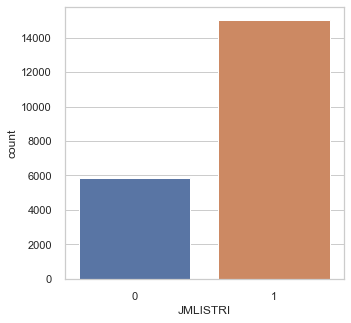

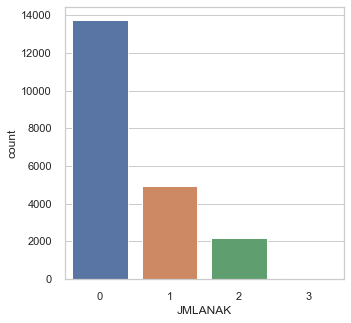

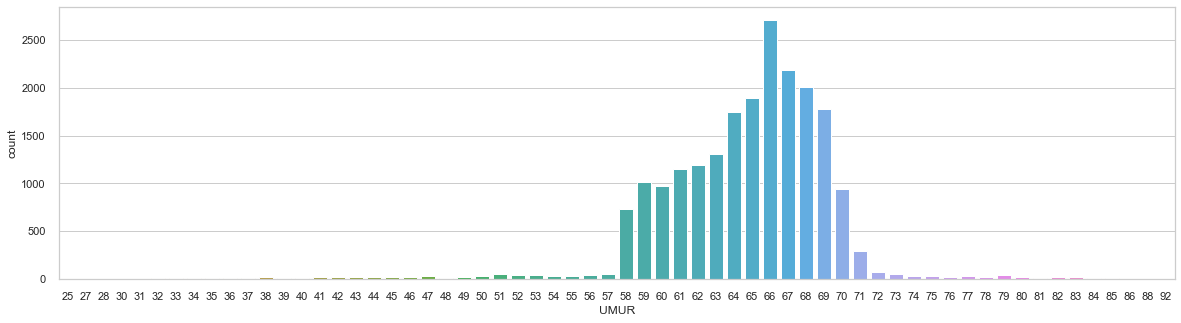

In [120]:
#grafik untuk data peserta pensiun

plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLISTRI", data=pensiun_da)

plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLANAK", data=pensiun_da)

plt.figure(figsize=(20,5))
p = sns.countplot(x="UMUR", data=pensiun_da)

2. *dataframe aktif*

In [67]:
# info detail dataframe aktif_da
aktif_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24289 entries, 0 to 24288
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   JMLISTRI       24289 non-null  int64
 1   JMLANAK        24289 non-null  int64
 2   THP            24289 non-null  int64
 3   UMUR           24289 non-null  int64
 4   Sisa Umur BUP  24289 non-null  int64
dtypes: int64(5)
memory usage: 948.9 KB


In [68]:
# cek data null aktif_da
aktif_da.isna().sum()

JMLISTRI         0
JMLANAK          0
THP              0
UMUR             0
Sisa Umur BUP    0
dtype: int64

In [69]:
# cek value dataframe aktif_da
aktif_da.head()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
0,1,2,5087820,51,7
1,1,2,5413290,52,6
2,1,2,6066168,55,3
3,1,1,4998560,47,11
4,1,1,5210016,49,9


In [70]:
# statistik dataframe aktif_da
aktif_da.describe()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
count,24289.000,24289.000,24289.000,24289.000,24289.000
mean,0.725,0.978,3678910.592,43.080,15.133
std,0.446,0.878,854397.501,9.609,9.452
min,0.000,0.000,1047800.000,20.000,-3.000
25%,0.000,0.000,3113220.000,36.000,7.000
50%,1.000,1.000,3578916.000,43.000,15.000
75%,1.000,2.000,4281800.000,52.000,22.000
max,1.000,3.000,6727368.000,70.000,38.000


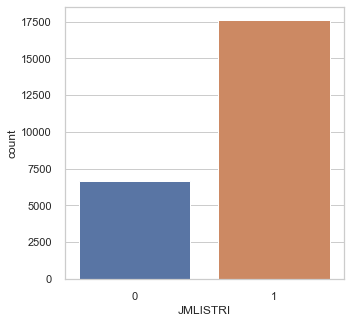

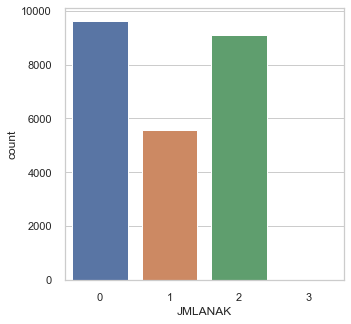

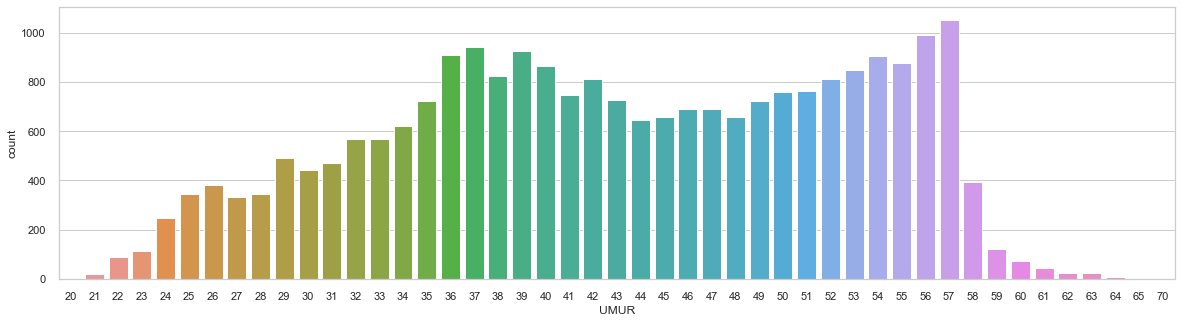

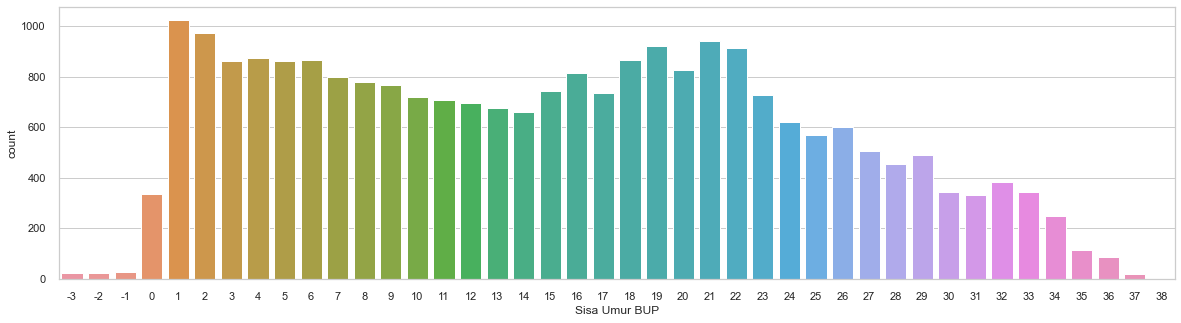

In [121]:
#grafik untuk data peserta aktif

plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLISTRI", data=aktif_da)

plt.figure(figsize=(5,5))
p = sns.countplot(x="JMLANAK", data=aktif_da)

plt.figure(figsize=(20,5))
p = sns.countplot(x="UMUR", data=aktif_da)

plt.figure(figsize=(20,5))
p = sns.countplot(x="Sisa Umur BUP", data=aktif_da)

* **Data Preprocessing and Exploratory Data Analysis** (*4 points*)

    * Do you need to normalize the data?
    * Do you need to scale the variables?
    * Other insight you have found.

1. *Preprocessing & EDA dataframe Pensiun*

In [72]:
# Normalize & Scale data pensiun
pensiun_scaled = StandardScaler().fit_transform(pensiun_da.values)
kol_pens = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR']
pensiun_scaled = pd.DataFrame(pensiun_scaled, columns=[kol_pens])
pensiun_scaled.head()

,JMLISTRI,JMLANAK,THP,UMUR
0,0.624,2.287,0.591,-0.969
1,0.624,0.814,1.286,-0.340
2,0.624,-0.658,-0.321,0.290
3,0.624,0.814,0.645,-0.340
4,0.624,2.287,-0.966,0.290


In [73]:
# data pensiun covarian
pensiun_scaled.cov()

,JMLISTRI,JMLANAK,THP,UMUR
JMLISTRI,1.000,0.327,0.201,-0.101
JMLANAK,0.327,1.000,-0.010,-0.152
THP,0.201,-0.010,1.000,-0.313
UMUR,-0.101,-0.152,-0.313,1.000


2. *Preprocessing & EDA dataframe Aktif*

In [74]:
# Normalize & Scale data aktif
aktif_scaled = StandardScaler().fit_transform(aktif_da.values)
kol_akt = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP']
aktif_scaled = pd.DataFrame(aktif_scaled, columns=[kol_akt])
aktif_scaled.head()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
0,0.615,1.165,1.649,0.824,-0.860
1,0.615,1.165,2.030,0.928,-0.966
2,0.615,1.165,2.794,1.241,-1.284
3,0.615,0.025,1.545,0.408,-0.437
4,0.615,0.025,1.792,0.616,-0.649


In [75]:
# data aktif covarian
aktif_scaled.cov()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
JMLISTRI,1.000,0.602,0.335,0.231,-0.237
JMLANAK,0.602,1.000,0.146,0.032,-0.040
THP,0.335,0.146,1.000,0.789,-0.768
UMUR,0.231,0.032,0.789,1.000,-0.994
Sisa Umur BUP,-0.237,-0.040,-0.768,-0.994,1.000


* **Model Fitting and Evaluation** (*8 points*)

    * What model do you use?
    * Do you need to preprocess data with PCA model?

1. *Model Fitting and Evaluation dataframe Pensiun*

In [76]:
# prop_small
prop_small_p = pensiun_scaled.head(300)

In [77]:
pca_small_p = PCA(n_components = 4, svd_solver='full')

pca_small_p.fit(prop_small_p)

PCA(n_components=4, svd_solver='full')

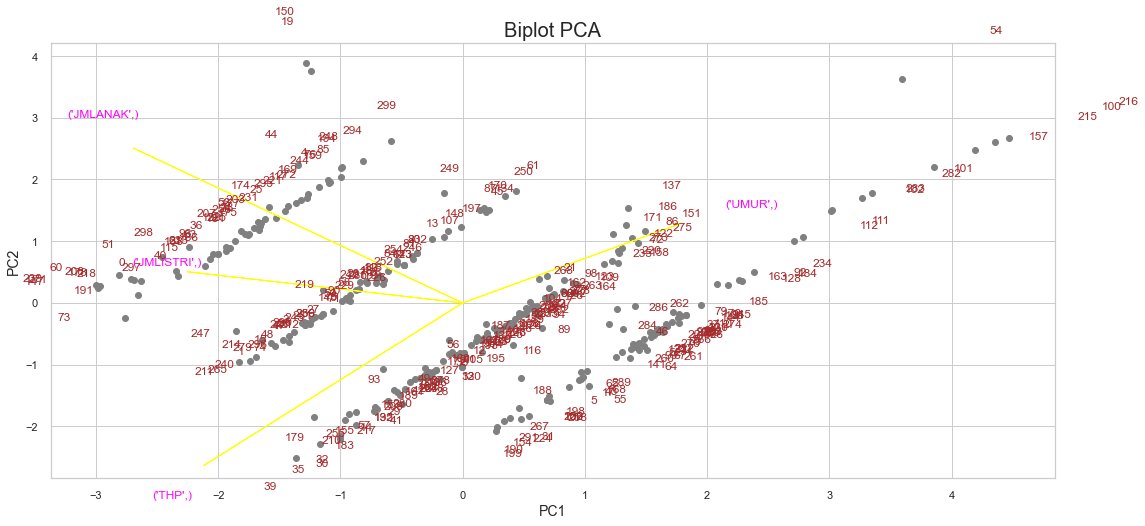

In [78]:
biplot_pca(prop_small_p)

In [79]:
#KMeans visualization
np.random.seed(100)
kmeans_ex_p = KMeans(n_clusters=4).fit(pensiun_scaled)

In [80]:
# code here
label_ex_p = kmeans_ex_p.labels_
print(label_ex_p)

[3 3 2 ... 2 3 2]


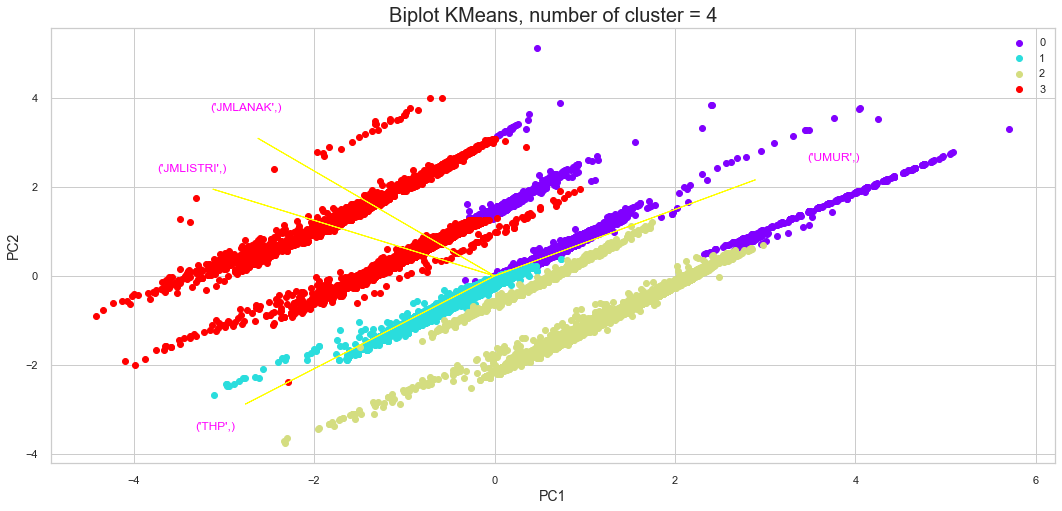

In [81]:
# code here
biplot_kmeans(pensiun_scaled, 4, feature_name=True)

2. *Model Fitting and Evaluation dataframe Aktif*

In [82]:
# PCA Visualization
prop_small_a = aktif_scaled.head(300)

In [83]:
pca_small_a = PCA(n_components = 5, svd_solver='full')

pca_small_a.fit(prop_small_a)

PCA(n_components=5, svd_solver='full')

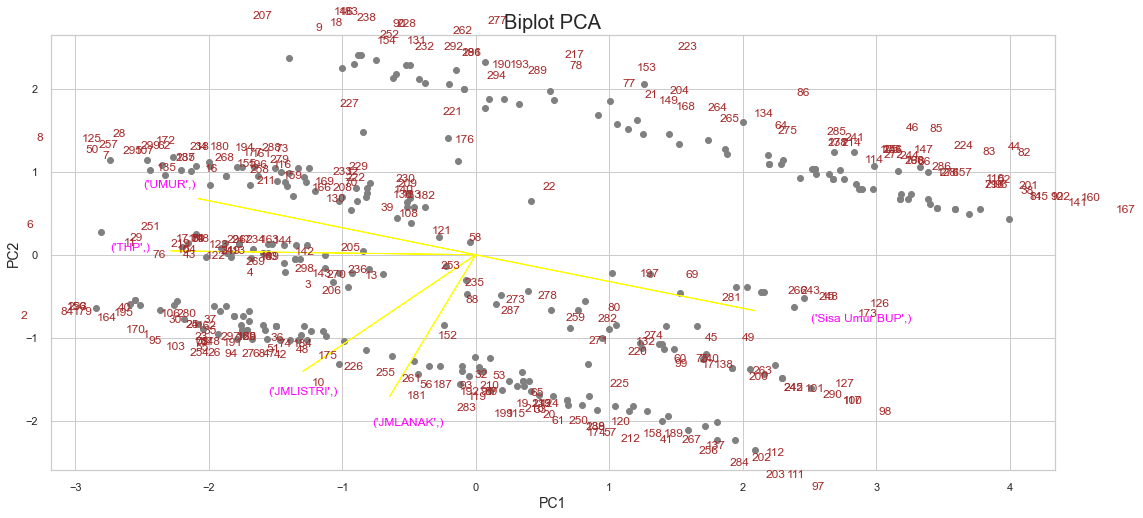

In [84]:
biplot_pca(prop_small_a)

In [85]:
#KMeans visualization
np.random.seed(100)
kmeans_ex_a = KMeans(n_clusters=5).fit(aktif_scaled)

In [86]:
# code here
label_ex_a = kmeans_ex_a.labels_
print(label_ex_a)

[2 2 2 ... 0 3 2]


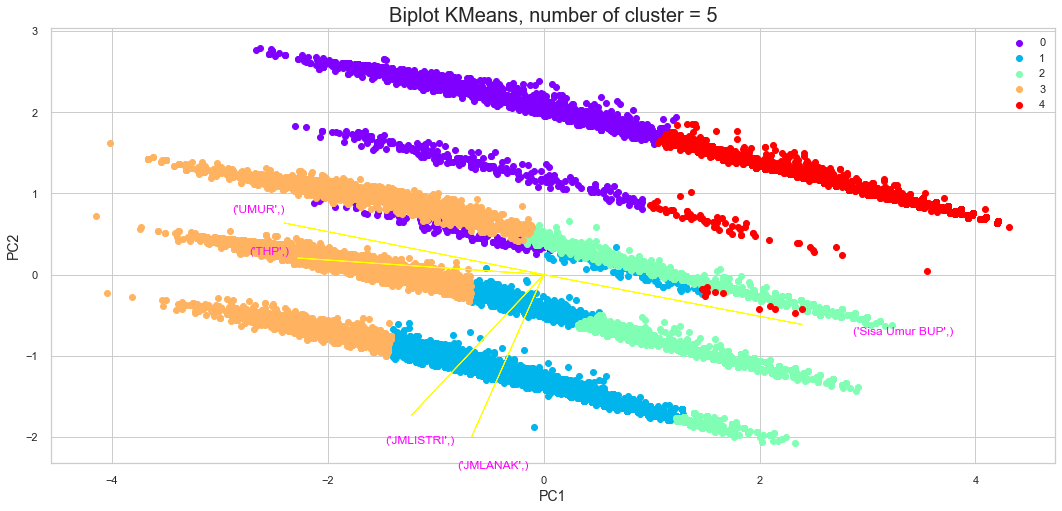

In [87]:
# code here
biplot_kmeans(aktif_scaled, 5, feature_name=True)

Kami tidak menggunakan PCA karena sudah drop outlier pada proses processing

* **Model Tuning** (*8 points*)
    * Build at least 2 models or build a model then tune the parameter later.
    * If the model is not satisfactory, what will you do to tune the model?
    * How many `k` do you use for clustering model?
    * Compare goodness of fit value for your model

1. *Model Tuning dataframe Pensiun*

In [88]:
#Goodness of fit:
WCSS_ex_p = kmeans_ex_p.inertia_
WCSS_ex_p

37967.34844890063

In [89]:
BCSS_ex_p = BCSS(pensiun_scaled.values,kmeans_ex_p)
BCSS_ex_p

45557.103702376764

In [90]:
TCSS_ex_p = WCSS_ex_p + BCSS_ex_p

In [91]:
Exp_Var_ex_p = (BCSS_ex_p/TCSS_ex_p)*100
Exp_Var_ex_p

54.54343312526597

In [92]:
print("WCSS : ", WCSS_ex_p)
print("BCSS : ", BCSS_ex_p)
print("TCSS : ", TCSS_ex_p)
print("Explained Variance: ", Exp_Var_ex_p)

WCSS :  37967.34844890063
BCSS :  45557.103702376764
TCSS :  83524.4521512774
Explained Variance:  54.54343312526597


In [93]:
#Melihat jumlah iterasi yang terjadi
kmeans_ex_p.n_iter_

19

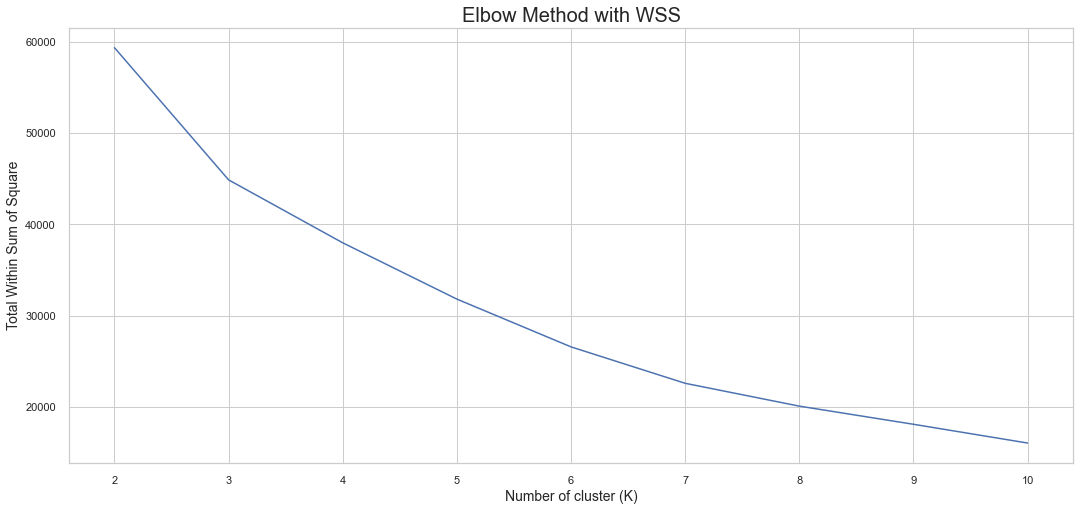

In [94]:
#Pemilihan K Optimum

plot_elbow(pensiun_scaled)

2. *Model Tuning dataframe Aktif*

In [95]:
#Goodness of fit:
WCSS_ex_a = kmeans_ex_a.inertia_
WCSS_ex_a

29231.67920792108

In [96]:
BCSS_ex_a = BCSS(aktif_scaled.values,kmeans_ex_a)
BCSS_ex_a

92211.95616781403

In [97]:
TCSS_ex_a = WCSS_ex_a + BCSS_ex_a

In [98]:
Exp_Var_ex_a = (BCSS_ex_a/TCSS_ex_a)*100
Exp_Var_ex_a

75.92983846581912

In [99]:
print("WCSS : ", WCSS_ex_a)
print("BCSS : ", BCSS_ex_a)
print("TCSS : ", TCSS_ex_a)
print("Explained Variance: ", Exp_Var_ex_a)

WCSS :  29231.67920792108
BCSS :  92211.95616781403
TCSS :  121443.63537573512
Explained Variance:  75.92983846581912


In [100]:
#Melihat jumlah iterasi yang terjadi
kmeans_ex_a.n_iter_

11

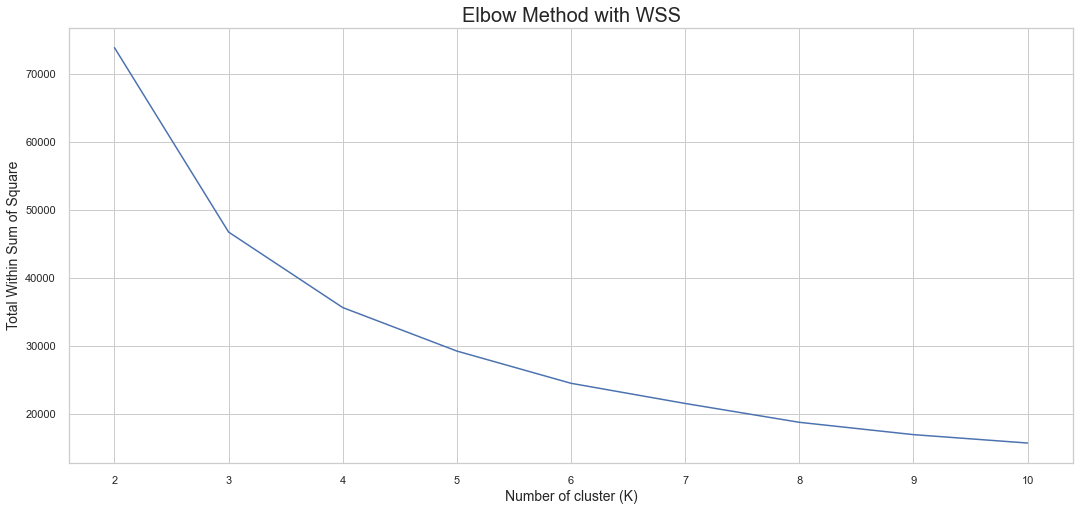

In [101]:
#Pemilihan K Optimum

plot_elbow(aktif_scaled)

* **Build Customer Profiling** (*8 points*)
    * What is characteristic of your customers?
    * Have you found special insight from your customers profile?
    * What is actionable plan you can formulate based on your characteristic customers?

1. *Customer Profiling dataframe Pensiun*

In [102]:
# code here
pensiun_da.head()

,JMLISTRI,JMLANAK,THP,UMUR
0,1,2,4415220,60
1,1,1,5170592,63
2,1,0,3422760,66
3,1,1,4473280,63
4,1,2,2720704,66


In [103]:
# code here
pensiun_clustered = pensiun_da.copy()
pensiun_clustered['label'] = list(label_ex_p)
pensiun_clustered.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
pensiun_clustered.shape

(20881, 5)

In [104]:
pensiun_clustered.head()

,JMLISTRI,JMLANAK,THP,UMUR,label
0,1,2,4415220,60,3
1,1,1,5170592,63,3
2,1,0,3422760,66,2
3,1,1,4473280,63,3
4,1,2,2720704,66,3


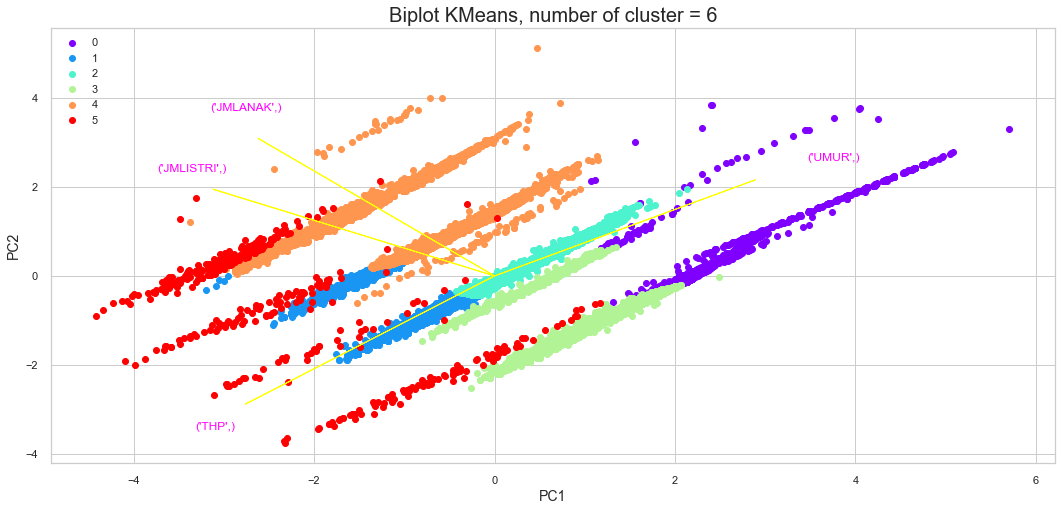

In [105]:
biplot_kmeans(pensiun_scaled, 6, feature_name=True)

In [106]:
pensiun_clustered.groupby('label').mean()

,JMLISTRI,JMLANAK,THP,UMUR
label,,,,
0,1.000,0.000,4506655.082,63.677
1,0.000,0.067,3667389.876,64.844
2,0.892,0.260,2470567.333,68.037
3,0.986,1.378,4028471.002,62.997


In [107]:
data_proviz_p = pensiun_scaled.copy()
data_proviz_p['label'] = list(label_ex_p)
data_proviz_p.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
data_proviz_p.shape

(20881, 5)

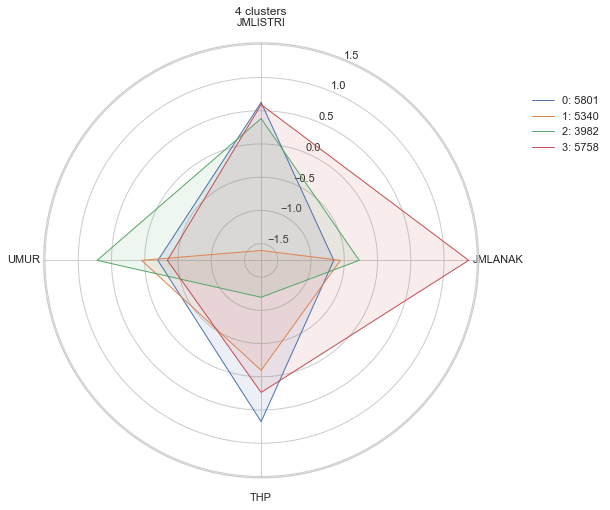

In [108]:
plot_cluster_radar(data_proviz_p,'label')

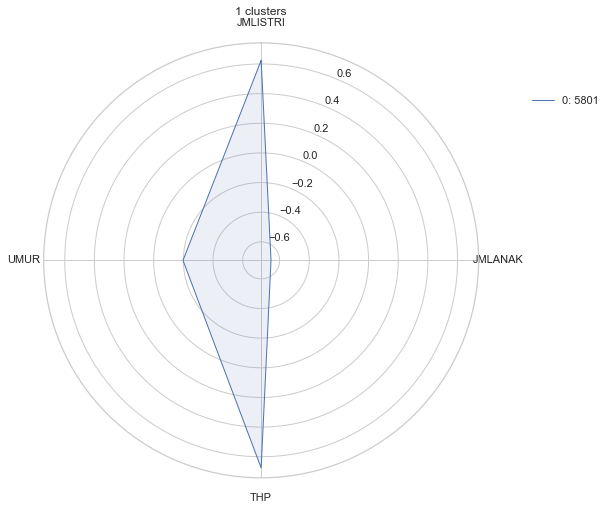

In [109]:
prof_p1 = pensiun_scaled.iloc[pensiun_clustered[pensiun_clustered['label']==0].index.values].copy()
prof_p1['label'] = pensiun_clustered[pensiun_clustered['label']==0]['label']
prof_p1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
prof_p1.shape
plot_cluster_radar(prof_p1,'label')

In [125]:
peserta_pensiun[['JMLISTRI','JMLANAK','MASKER','BUP','TGL_LAHIR','UMUR','THP', 'NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[pensiun_clustered[pensiun_clustered['label']==0].index.values].sort_values(by='THP', ascending=True).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
20297,1,0,3,58,1982-07-31,39,1425160,DIRJEN PAJAK,"SDH MENGALAMI KEJADIAN, BLM KLAIM",PNS PUSAT,JAKARTA
19819,1,0,3,58,1980-09-18,41,1425160,INSPEKTORAT JENDERAL,"SDH MENGALAMI KEJADIAN, BLM KLAIM",PNS PUSAT,JAKARTA
7287,1,0,11,58,1972-08-28,49,1879350,DINAS PENGAWASAN DAN PENERTIBAN BANGUNAN,PEGAWAI KELUAR,PNS DAERAH OTONOM,JAKARTA UTARA
20587,1,0,13,58,1969-08-26,52,1933580,BADAN PENDIDIKAN DAN PELATIHAN KEUANGAN,PEGAWAI KELUAR,PNS PUSAT,JAKARTA TIMUR
20725,1,0,12,58,1972-09-09,49,1979010,KANTOR PERWAKILAN RI DI JENEWA,"SDH MENGALAMI KEJADIAN, BLM KLAIM",PNS PUSAT,JAKARTA
12634,1,0,2,58,1985-01-24,36,2150390,BADAN PENGAWAS PASAR MODAL DAN LEMBAGA KEUANGAN,"SDH MENGALAMI KEJADIAN, BLM KLAIM",PNS PUSAT,DKI JAKARTA
16505,1,0,7,58,1984-11-24,37,2283490,ADMINISTRASI UMUM,PEGAWAI KELUAR,PNS PUSAT,JAKARTA BARAT
19925,1,0,2,58,1984-10-13,37,2480720,BADAN PENDIDIKAN DAN PELATIHAN KEUANGAN,"SDH MENGALAMI KEJADIAN, BLM KLAIM",PNS PUSAT,JAKARTA
15726,1,0,4,58,1983-06-28,38,2558930,PUSAT SISTEM INFORMASI DAN TEKNOLOGI KEUANGAN,PEGAWAI KELUAR,PNS PUSAT,DKI JAKARTA
18499,1,0,7,58,1989-06-05,32,2565750,PERUM LPPNPI,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN BUKAN TASPEN,KABUPATEN TANGERANG


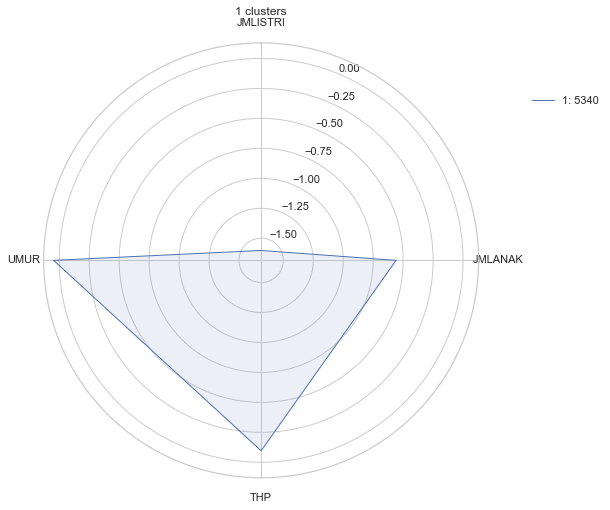

In [122]:
prof_p1 = pensiun_scaled.iloc[pensiun_clustered[pensiun_clustered['label']==1].index.values].copy()
prof_p1['label'] = pensiun_clustered[pensiun_clustered['label']==1]['label']
prof_p1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
prof_p1.shape
plot_cluster_radar(prof_p1,'label')

In [124]:
peserta_pensiun[['JMLISTRI','JMLANAK','MASKER','BUP','TGL_LAHIR','UMUR','THP', 'NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[pensiun_clustered[pensiun_clustered['label']==1].index.values].sort_values(by='THP', ascending=True).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
4970,0,0,7,58,1962-07-11,59,54400,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA UTARA
6449,0,0,12,58,1963-05-11,58,63300,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA TIMUR
6094,0,0,10,58,1961-05-16,60,246500,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA TIMUR
4413,0,0,16,58,1963-01-01,58,280410,PT PELINDO KANTOR PUSAT,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA TIMUR
286,0,0,13,56,1972-07-20,49,653000,PT. KAI BALAIYASA,PEGAWAI KELUAR,PEGAWAI PERSEROAN TERBATAS,JAKARTA SELATAN
20875,0,0,13,58,1971-08-14,50,782300,PT. KAI DAOP 1 JAKARTA,PEGAWAI KELUAR,PT KAI EX PNS DEPHUB,DKI JAKARTA
851,0,0,13,56,1957-12-19,64,816161,PERUM PERHUTANI,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KABUPATEN TANGERANG
18282,0,0,4,58,1964-06-16,57,820000,TEKNIS GOLONGAN IV DAN II,PEGAWAI KELUAR,PNS PUSAT,JAKARTA SELATAN
2814,0,0,25,56,1957-07-16,64,845100,COMUTER JABODETABEK,PEGAWAI PENSIUN,PEGAWAI PERSEROAN TERBATAS,JAKARTA UTARA
19764,0,0,25,56,1958-12-14,63,845100,PT. KAI DAOP 1 JAKARTA,PEGAWAI PENSIUN,PEGAWAI PERSEROAN TERBATAS,JAKARTA SELATAN


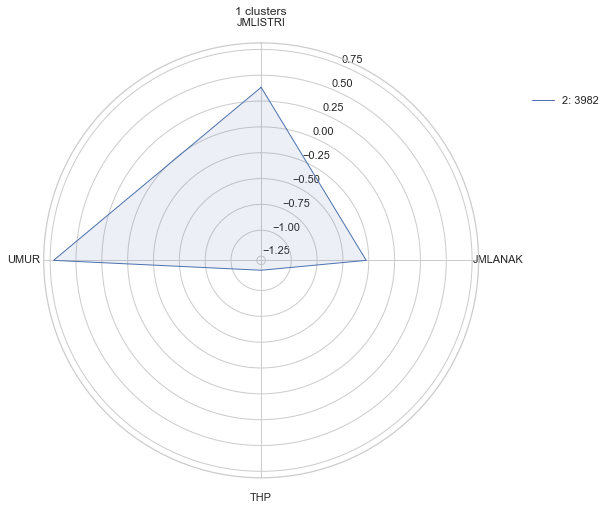

In [137]:
prof_p1 = pensiun_scaled.iloc[pensiun_clustered[pensiun_clustered['label']==2].index.values].copy()
prof_p1['label'] = pensiun_clustered[pensiun_clustered['label']==2]['label']
prof_p1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
prof_p1.shape
plot_cluster_radar(prof_p1,'label')

In [138]:
peserta_pensiun[['JMLISTRI','JMLANAK','MASKER','BUP','TGL_LAHIR','UMUR','THP', 'NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[pensiun_clustered[pensiun_clustered['label']==2].index.values].sort_values(by='THP', ascending=True).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
7124,0,0,12,58,1940-07-15,81,34400,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA UTARA
9135,0,0,5,58,1960-06-02,61,47200,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI
768,0,0,8,58,1958-04-05,63,51100,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,DEPOK
4349,0,0,7,58,1959-03-29,62,51100,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA UTARA
1989,0,0,7,58,1960-05-08,61,54400,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI
6095,0,0,7,58,1960-10-13,61,54400,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI
11390,0,0,9,58,1961-04-03,60,55000,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI
8407,0,0,11,58,1957-06-23,64,58800,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA TIMUR
4684,0,0,18,58,1942-12-31,79,63000,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA UTARA
6448,0,0,12,58,1960-04-03,61,63300,PT PELINDO KANTOR PUSAT,PEGAWAI KELUAR,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI


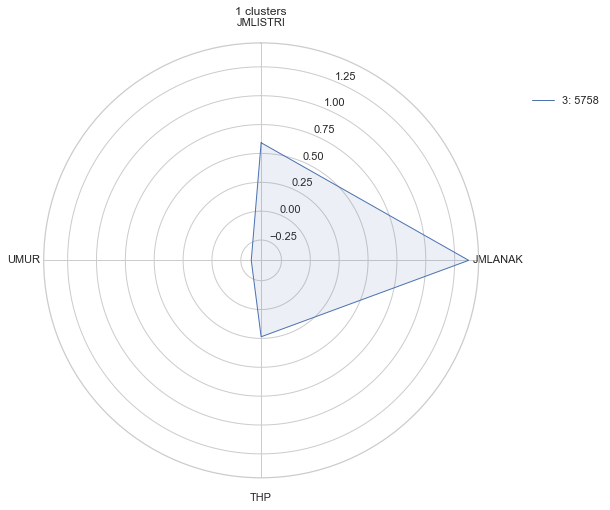

In [139]:
prof_p1 = pensiun_scaled.iloc[pensiun_clustered[pensiun_clustered['label']==3].index.values].copy()
prof_p1['label'] = pensiun_clustered[pensiun_clustered['label']==3]['label']
prof_p1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR','label']
prof_p1.shape
plot_cluster_radar(prof_p1,'label')

In [140]:
peserta_pensiun[['JMLISTRI','JMLANAK','MASKER','BUP','TGL_LAHIR','UMUR','THP', 'NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[pensiun_clustered[pensiun_clustered['label']==3].index.values].sort_values(by='THP', ascending=True).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
44,1,2,7,58,1967-06-17,54,967746,BULOG KATEGORI 2,PEGAWAI PENSIUN,PEGAWAI PNS BULOG,JAKARTA
471,0,2,22,58,1959-08-24,62,1117990,PERUM PERHUTANI,PEGAWAI PENSIUN,PNS PUSAT,JAKARTA SELATAN
11492,1,2,32,58,1955-04-28,66,1212500,PT. KAI DAOP 1 JAKARTA,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,BOGOR
1143,1,3,21,58,1960-09-16,61,1246988,PERUM PERHUTANI,PEGAWAI PENSIUN,PEGAWAI PERUSAHAAN UMUM,KAB BOGOR
1487,0,2,19,58,1965-01-11,56,1267400,PERUM PERHUTANI,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KABUPATEN TANGERANG
150,1,3,28,56,1954-05-04,67,1292008,PT. KAI BALAIYASA,PEGAWAI PENSIUN,PEGAWAI PERSEROAN TERBATAS,JAKARTA SELATAN
1135,1,2,21,56,1962-05-04,59,1333219,PERUM PERHUTANI,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA BARAT
1305,1,2,32,58,1954-09-22,67,1382250,PT. KAI BALAIYASA,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,JAKARTA SELATAN
587,1,2,37,58,1960-10-16,61,1440300,PERUM PERHUTANI,PEGAWAI PENSIUN,PNS YANG DIPERBANTUKAN KEBUMN PESERTA TASPEN,KOTA BEKASI
7323,1,2,5,58,1979-08-07,42,1469962,DINAS PENGAWASAN DAN PENERTIBAN BANGUNAN,PEGAWAI KELUAR,PNS DAERAH OTONOM,DEPOK


2. *Customer Profiling dataframe Aktif*

In [111]:
# code here
aktif_da.head()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
0,1,2,5087820,51,7
1,1,2,5413290,52,6
2,1,2,6066168,55,3
3,1,1,4998560,47,11
4,1,1,5210016,49,9


In [112]:
# code here
aktif_clustered = aktif_da.copy()
aktif_clustered['label'] = list(label_ex_a)
aktif_clustered.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
aktif_clustered.shape

(24289, 6)

In [113]:
aktif_clustered.head()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP,label
0,1,2,5087820,51,7,2
1,1,2,5413290,52,6,2
2,1,2,6066168,55,3,2
3,1,1,4998560,47,11,2
4,1,1,5210016,49,9,2


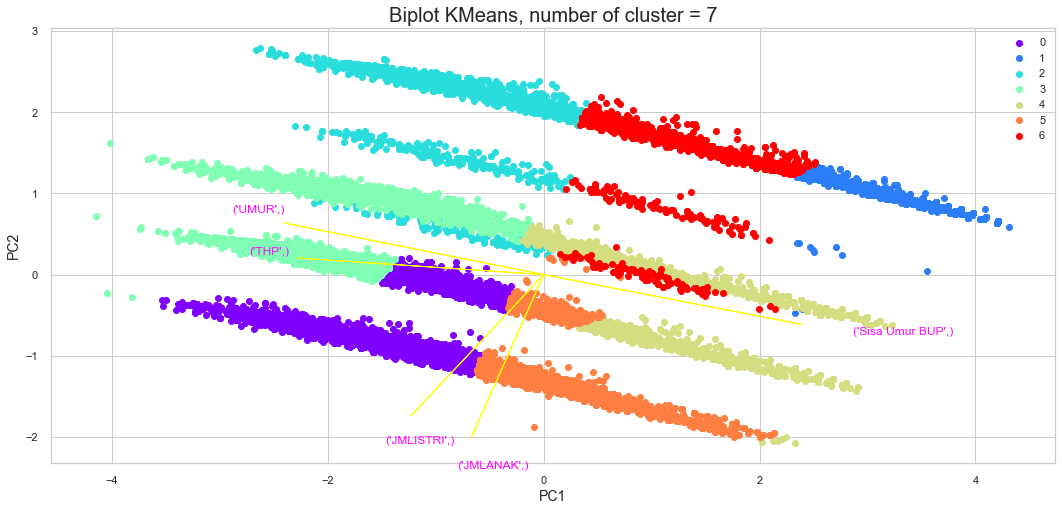

In [114]:
biplot_kmeans(aktif_scaled, 7, feature_name=True)

In [115]:
aktif_clustered.groupby('label').mean()

,JMLISTRI,JMLANAK,THP,UMUR,Sisa Umur BUP
label,,,,,
0,1.000,0.764,3076656.816,33.451,24.600
1,0.000,0.187,4015647.402,51.033,7.465
2,1.000,0.905,4553636.225,53.308,5.084
3,0.000,0.024,2631907.931,31.113,26.955
4,0.988,1.892,3562158.154,41.235,16.858


In [116]:
data_proviz_a = aktif_scaled.copy()
data_proviz_a['label'] = list(label_ex_a)
data_proviz_a.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
data_proviz_a.shape

(24289, 6)

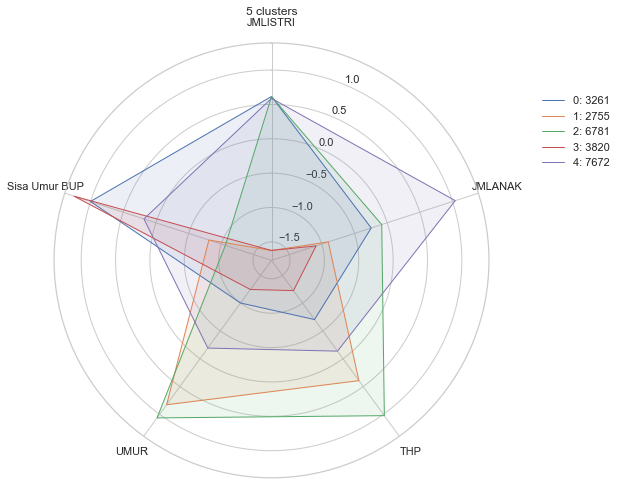

In [117]:
plot_cluster_radar(data_proviz_a,'label')

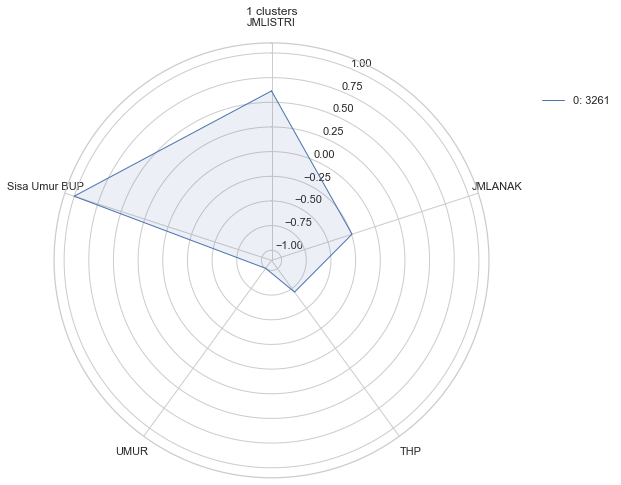

In [126]:
prof_a1 = aktif_scaled.iloc[aktif_clustered[aktif_clustered['label']==0].index.values].copy()
prof_a1['label'] = aktif_clustered[aktif_clustered['label']==0]['label']
prof_a1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
prof_a1.shape
plot_cluster_radar(prof_a1,'label')

In [129]:
peserta_aktif[['JMLISTRI','JMLANAK','MASKER','BUP','Sisa Umur BUP','TGL_LAHIR','UMUR','THP','NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[aktif_clustered[aktif_clustered['label']==0].index.values].sort_values(by='THP', ascending=False).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,Sisa Umur BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
3673,1,0,17,58,17,1980-04-27,41,4291650,RUMAH SAKIT UMUM KELAS D KALIDERES,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
24143,1,0,15,60,18,1979-12-08,42,4160640,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,KOTA BEKASI
10051,1,0,15,58,17,1980-02-26,41,4160640,BADAN PENELITIAN DAN PENGEMBANGAN SUMBER DAYA ...,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
23464,1,0,15,58,17,1980-11-27,41,4160640,SEKRETARIAT KABINET RI,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
11499,1,0,15,58,19,1982-06-26,39,4160640,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,JAKARTA TIMUR
20310,1,0,17,58,17,1980-04-23,41,4117410,PPPPTK BAHASA,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
24168,1,0,17,58,18,1981-08-10,40,4117410,KANTOR PUSAT DIREKTORAT JENDERAL PERBENDAHARAAN,PEGAWAI TETAP,PNS PUSAT,JAKARTA BARAT
13706,1,0,17,58,20,1983-04-12,38,4117410,SATUAN POLISI PAMONG PRAJA,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA TIMUR
1901,1,0,17,58,16,1979-05-23,42,4117410,SUKU DINAS PEMUDA DAN OLAHRAGA KOTA ADM. JAKA...,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA SELATAN
23407,1,0,13,62,21,1980-08-06,41,4033590,MAHKAMAH KONSTITUSI RI,PEGAWAI TETAP,PNS PUSAT,KOTA TANGERANG SELATAN


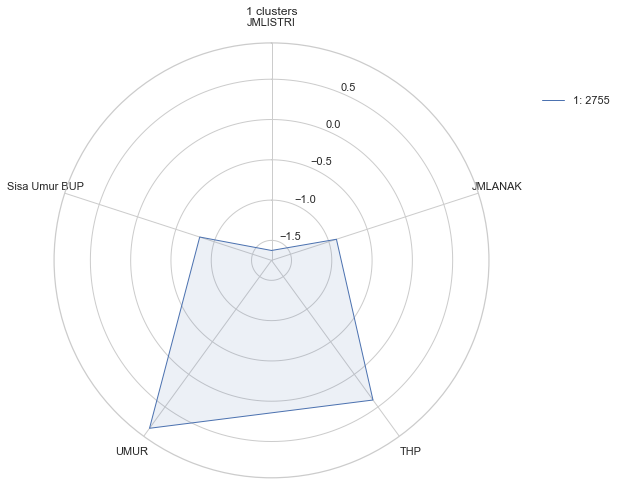

In [128]:
prof_a1 = aktif_scaled.iloc[aktif_clustered[aktif_clustered['label']==1].index.values].copy()
prof_a1['label'] = aktif_clustered[aktif_clustered['label']==1]['label']
prof_a1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
prof_a1.shape
plot_cluster_radar(prof_a1,'label')

In [130]:
peserta_aktif[['JMLISTRI','JMLANAK','MASKER','BUP','Sisa Umur BUP','TGL_LAHIR','UMUR','THP','NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[aktif_clustered[aktif_clustered['label']==1].index.values].sort_values(by='THP', ascending=False).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,Sisa Umur BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
21728,0,0,32,65,7,1963-09-30,58,5901200,RUMAH SAKIT PASAR REBO,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA SELATAN
3941,0,0,32,65,3,1959-06-19,62,5901200,PUSAT KESEHATAN MASYARAKAT KECAMATAN DUREN SA,PEGAWAI TETAP,PNS DAERAH OTONOM,KOTA BEKASI
11056,0,0,32,65,3,1959-08-26,62,5901200,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA
15553,0,0,32,65,3,1959-01-22,62,5901200,RUMAH SAKIT KOJA,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA UTARA
23687,0,0,32,60,1,1962-02-16,59,5901200,PERPUSTAKAAN NASIONAL RI,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
8965,0,0,32,65,7,1963-10-01,58,5901200,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
7555,0,0,32,65,2,1958-03-12,63,5901200,BADAN PENGEMBANGAN SUMBER DAYA MANUSIA,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA
12246,0,0,31,65,5,1961-09-20,60,5721000,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
1154,0,0,32,65,5,1961-08-16,60,5661700,PUSAT KESEHATAN MASYARAKAT KECAMATAN PANCORAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
4960,0,0,32,65,6,1962-06-30,59,5661700,RUMAH SAKIT UMUM KELAS D MAMPANG PRAPATAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA


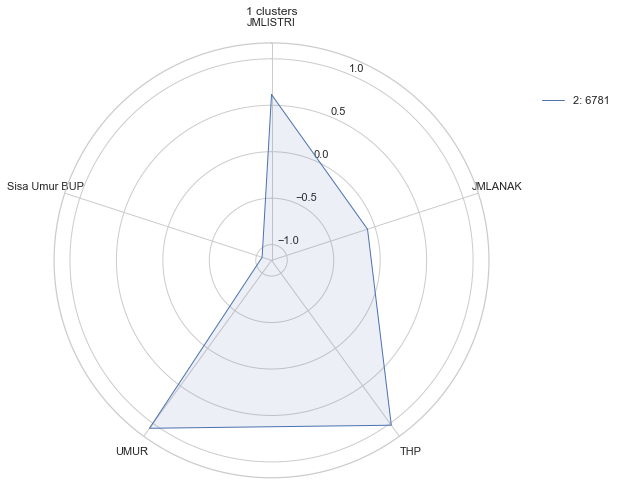

In [131]:
prof_a1 = aktif_scaled.iloc[aktif_clustered[aktif_clustered['label']==2].index.values].copy()
prof_a1['label'] = aktif_clustered[aktif_clustered['label']==2]['label']
prof_a1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
prof_a1.shape
plot_cluster_radar(prof_a1,'label')

In [132]:
peserta_aktif[['JMLISTRI','JMLANAK','MASKER','BUP','Sisa Umur BUP','TGL_LAHIR','UMUR','THP','NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[aktif_clustered[aktif_clustered['label']==2].index.values].sort_values(by='THP', ascending=False).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,Sisa Umur BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
11249,1,2,32,65,3,1959-08-01,62,6727368,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
23856,1,1,32,62,5,1964-12-16,57,6609344,"GOLONGAN I, II, III DAN IV",PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
15432,1,1,32,65,0,1956-06-16,65,6609344,PUSAT PENELITIAN KEBIJAKAN,SUDAH BUP GAJI MASIH DIBAYARKAN,PNS PUSAT,DKI JAKARTA
12733,1,1,32,62,2,1961-09-10,60,6609344,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,DEPOK
8776,1,0,32,65,4,1960-01-09,61,6491320,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,KOTA BEKASI
853,1,0,32,65,6,1962-09-11,59,6491320,RUMAH SAKIT UMUM KELAS D TEBET,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA TIMUR
11054,1,0,32,65,5,1961-08-17,60,6491320,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
24046,1,0,32,65,3,1959-12-26,62,6491320,BADAN PENELITIAN DAN PENGEMBANGAN SUMBER DAYA ...,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
11055,1,0,32,65,7,1963-07-15,58,6491320,RUMAH SAKIT TARAKAN,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA SELATAN
19126,1,0,32,65,2,1958-04-10,63,6491320,PUSAT PENELITIAN KEBIJAKAN,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA


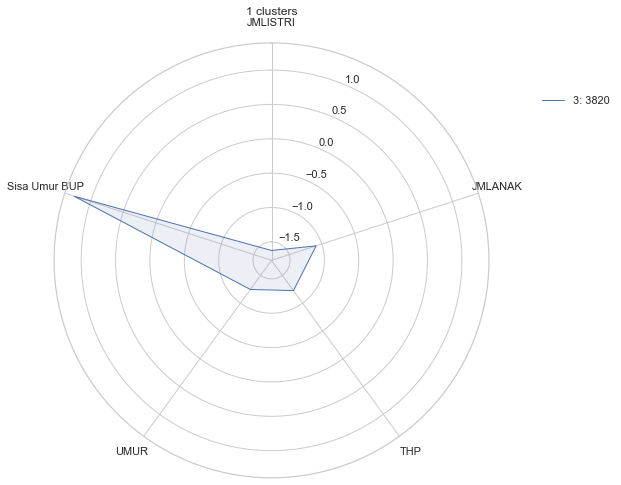

In [133]:
prof_a1 = aktif_scaled.iloc[aktif_clustered[aktif_clustered['label']==3].index.values].copy()
prof_a1['label'] = aktif_clustered[aktif_clustered['label']==3]['label']
prof_a1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
prof_a1.shape
plot_cluster_radar(prof_a1,'label')

In [134]:
peserta_aktif[['JMLISTRI','JMLANAK','MASKER','BUP','Sisa Umur BUP','TGL_LAHIR','UMUR','THP','NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[aktif_clustered[aktif_clustered['label']==3].index.values].sort_values(by='THP', ascending=False).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,Sisa Umur BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
3136,0,0,17,65,24,1980-03-10,41,3901500,PUSAT KESEHATAN MASYARAKAT KECAMATAN SETIA BU,PEGAWAI TETAP,PNS DAERAH OTONOM,KOTA BEKASI
20162,0,0,15,60,22,1983-05-17,38,3782400,BADAN PENDIDIKAN DAN PELATIHAN KEUANGAN,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
995,0,0,17,58,20,1983-11-07,38,3743100,BIRO KERJA SAMA DAERAH,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
10445,0,0,17,58,19,1982-07-26,39,3743100,KANTOR KELURAHAN KAMAL KEC. KALIDERES JAK. BA,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
21005,0,0,13,58,22,1985-01-23,36,3666900,SEKRERTARIAT DITJEN APLIKASI INFORMATIKA,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
1156,0,0,13,60,22,1983-05-25,38,3666900,PUSAT KESEHATAN MASYARAKAT KECAMATAN PANCORAN,PEGAWAI TETAP,PNS DAERAH OTONOM,KOTA BEKASI
21534,0,0,15,58,19,1982-06-11,39,3628900,INSPEKTORAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
965,0,0,15,65,26,1982-12-07,39,3628900,PUSAT KESEHATAN MASYARAKAT KECAMATAN TANAH AB,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA
16654,0,0,15,58,19,1982-11-25,39,3628900,KANTOR PELAYANAN PAJAK WAJIB PAJAK BESAR TIGA,PEGAWAI TETAP,PNS PUSAT,JAKARTA TIMUR
23539,0,0,15,58,19,1982-09-14,39,3628900,INSPEKTORAT,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA


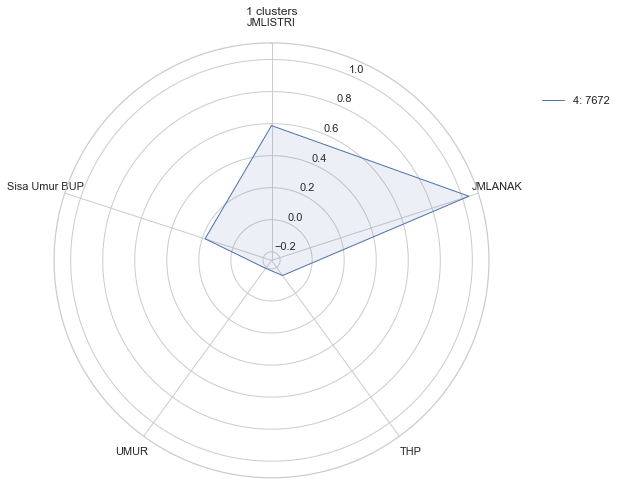

In [135]:
prof_a1 = aktif_scaled.iloc[aktif_clustered[aktif_clustered['label']==4].index.values].copy()
prof_a1['label'] = aktif_clustered[aktif_clustered['label']==4]['label']
prof_a1.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'UMUR', 'Sisa Umur BUP','label']
prof_a1.shape
plot_cluster_radar(prof_a1,'label')

In [136]:
peserta_aktif[['JMLISTRI','JMLANAK','MASKER','BUP','Sisa Umur BUP','TGL_LAHIR','UMUR','THP','NAMA_SATKER', 'NAMA_STATUS_PEGAWAI', 'NAMA_JENIS_PEGAWAI', 'NAMA_DATI2']].loc[aktif_clustered[aktif_clustered['label']==4].index.values].sort_values(by='THP', ascending=False).head(10)

,JMLISTRI,JMLANAK,MASKER,BUP,Sisa Umur BUP,TGL_LAHIR,UMUR,THP,NAMA_SATKER,NAMA_STATUS_PEGAWAI,NAMA_JENIS_PEGAWAI,NAMA_DATI2
10,1,2,21,58,14,1977-01-17,44,5141058,DEPUTI GUBERNUR PROV.DKI JAKARTA,PEGAWAI TETAP,PNS DAERAH OTONOM,KOTA BEKASI
19657,1,2,23,65,17,1973-07-14,48,5087820,"BALAI JARINGAN NFORMASI IPTEK SERPONG GOL. II,...",PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
4957,1,2,21,65,18,1974-04-17,47,4932438,PUSAT KESEHATAN MASYARAKAT KECAMATAN CILINCIN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA
23681,1,2,21,65,18,1974-08-04,47,4932438,BADAN KEBIJAKAN FISKAL,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
803,1,2,21,58,13,1976-10-14,45,4932438,BIRO KERJA SAMA DAERAH,PEGAWAI TETAP,PNS DAERAH OTONOM,JAKARTA UTARA
15178,1,2,21,60,16,1977-10-24,44,4932438,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,JAKARTA TIMUR
23904,1,2,21,60,15,1976-05-12,45,4932438,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
23905,1,2,21,60,15,1976-01-19,45,4932438,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
15154,1,2,21,60,14,1975-02-17,46,4932438,SEKRETARIAT JENDERAL,PEGAWAI TETAP,PNS PUSAT,DKI JAKARTA
757,1,2,21,58,15,1978-08-31,43,4932438,BIRO PEMERINTAHAN,PEGAWAI TETAP,PNS DAERAH OTONOM,DKI JAKARTA


* **Conclusion** (*2 points*)
    * Is your goal achieved?
    * Is the problem can be solved by machine learning?
    * What model did you use and how is the performance?
    * What is the potential business implementation of your capstone project?

# Summary

- Is your goal achieved?
YES. Our goals achieved.

- Is the problem can be solved by machine learning?
YES. Our problem can be solved by machine learning.

- What model did you use and how is the performance?
We use K-Means Models. We have two dataframes, peserta_pensiun has 54.6% performance and peserta_aktif has 75.9%.

- What is the potential business implementation of your capstone project?
By creating customer segmentation on the data of Taspen customers, both active and pension, we can do customer profiling based on the cluster of customer. With this profiling, it is easier to make effective and targeted sales.

Examples of Taspen Life Products are as follows:

1. Taspen Dwiguna Sejahtera (Payment at once 5 – 10 million at the beginning), for Taspen Customers entering the Pension Age Limit (BUP), aged not more than 60 years 5 months, ASN can register their wife and children.
2. Taspen Proteksi Scholarship (Protection that provides benefits for children's education planning), for active ASN, aged 18 - 60 years, age of registered children 0-16 years, number of children as heirs
3. Taspen Bright Life (Protection Product with Return of Premium facility), for Active ASN, aged 18-75 years, remaining working period of at least 10 years, ASN can register wife and children
4. Taspen Smart Save (Provides end-of-contract benefits in the form of premium contributions plus its development), for Active ASN, the remaining working period is related to the length of premium payment, THT development funds

Example Case:

1. Taspen Dwiguna Sejahtera products which have product characteristics for customers who are entering the retirement age limit can target clusters of active participants with label 2. In this cluster, most of the participants will retire in the next 3-5 years and have middle to upper THP. In this cluster, customers have wives and children who have the potential to get a top-up for Taspen Dwiguna Sejahtera products.

2. The Taspen Proteksi Scholarship product has product characteristics for participants that provide benefits for children's education planning targeting clusters of active ASN with labels 4. In this cluster, most of the participants are 30-40 years old who have 1-2 children who have the potential to need education funds from Taspen Scholarship Protection Products.

3. Then from the company side, the marketing division can be more effective in terms of strategy, costs and human resources in helping to offer products that match the characteristics of the cluster.